In [1]:
pwd

'/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/Project-Diabetes dataset'

In [2]:
cd dataset_diabetes

/Users/Bru/Desktop/MS-PA/Spring2017/CSC478-ML/Project-Diabetes dataset/dataset_diabetes


In [3]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 999)
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
#Importing data into a pandas dataframe
#Replacing all "?" (missing values) with NaN
diabetic_df = pd.read_table('diabetic_data.csv',na_values='?',sep=',')
diabetic_df.head()

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,encounter_id,patient_nbr,race,gender,age,weight,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,payer_code,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
0,2278392,8222157,Caucasian,Female,[0-10),NaN,6,25,1,1,NaN,Pediatrics-Endocrinology,41,0,1,0,0,0,250.83,NaN,NaN,1,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,NO
1,149190,55629189,Caucasian,Female,[10-20),NaN,1,1,7,3,NaN,NaN,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,>30
2,64410,86047875,AfricanAmerican,Female,[20-30),NaN,1,1,7,2,NaN,NaN,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
3,500364,82442376,Caucasian,Male,[30-40),NaN,1,1,7,2,NaN,NaN,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,No,Ch,Yes,NO
4,16680,42519267,Caucasian,Male,[40-50),NaN,1,1,7,1,NaN,NaN,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Ch,Yes,NO


In [5]:
diabetic_df.shape

(101766, 50)

In [6]:
diabetic_df.describe()

,encounter_id,patient_nbr,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
count,1.017660e+05,1.017660e+05,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000,101766.000000
mean,1.652016e+08,5.433040e+07,2.024006,3.715642,5.754437,4.395987,43.095641,1.339730,16.021844,0.369357,0.197836,0.635566,7.422607
std,1.026403e+08,3.869636e+07,1.445403,5.280166,4.064081,2.985108,19.674362,1.705807,8.127566,1.267265,0.930472,1.262863,1.933600
min,1.252200e+04,1.350000e+02,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,8.496119e+07,2.341322e+07,1.000000,1.000000,1.000000,2.000000,31.000000,0.000000,10.000000,0.000000,0.000000,0.000000,6.000000
50%,1.523890e+08,4.550514e+07,1.000000,1.000000,7.000000,4.000000,44.000000,1.000000,15.000000,0.000000,0.000000,0.000000,8.000000
75%,2.302709e+08,8.754595e+07,3.000000,4.000000,7.000000,6.000000,57.000000,2.000000,20.000000,0.000000,0.000000,1.000000,9.000000
max,4.438672e+08,1.895026e+08,8.000000,28.000000,25.000000,14.000000,132.000000,6.000000,81.000000,42.000000,76.000000,21.000000,16.000000


In [7]:
diabetic_df.describe(include=[np.object])

,race,gender,age,weight,payer_code,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,99493,101766,101766,3197,61510,51817,101745,101408,100343,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766,101766
unique,5,3,10,9,17,72,716,748,789,4,4,4,4,4,4,4,2,4,4,2,4,4,4,4,2,3,1,1,4,4,2,2,2,2,2,2,3
top,Caucasian,Female,[70-80),[75-100),MC,InternalMedicine,428,276,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,76099,54708,26068,1336,32439,14635,6862,6752,11555,96420,84748,81778,100227,101063,101680,96575,101765,89080,91116,101743,94438,95401,101458,101728,101763,101727,101766,101766,47383,101060,101753,101765,101764,101765,54755,78363,54864


In [8]:
diabetic_df.columns

Index(['encounter_id', 'patient_nbr', 'race', 'gender', 'age', 'weight',
       'admission_type_id', 'discharge_disposition_id', 'admission_source_id',
       'time_in_hospital', 'payer_code', 'medical_specialty',
       'num_lab_procedures', 'num_procedures', 'num_medications',
       'number_outpatient', 'number_emergency', 'number_inpatient', 'diag_1',
       'diag_2', 'diag_3', 'number_diagnoses', 'max_glu_serum', 'A1Cresult',
       'metformin', 'repaglinide', 'nateglinide', 'chlorpropamide',
       'glimepiride', 'acetohexamide', 'glipizide', 'glyburide', 'tolbutamide',
       'pioglitazone', 'rosiglitazone', 'acarbose', 'miglitol', 'troglitazone',
       'tolazamide', 'examide', 'citoglipton', 'insulin',
       'glyburide-metformin', 'glipizide-metformin',
       'glimepiride-pioglitazone', 'metformin-rosiglitazone',
       'metformin-pioglitazone', 'change', 'diabetesMed', 'readmitted'],
      dtype='object')

In [9]:
diabetic_df.get_dtype_counts()
#13 numerical attributes and 37 categorical attributes

int64     13
object    37
dtype: int64

## Data cleaning and preprocessing

The preliminary dataset contained multiple inpatient visits for the same patient – there is more than one encounter for many of the patients and the observations could not be considered as statistically independent. Only one patient per encounter is used for further analysis. The first encounter for each patient as the primary admission is considered and determined whether they were readmitted within 30 days.

In [10]:
diabetic_df.patient_nbr.value_counts()

88785891     40
43140906     28
23199021     23
1660293      23
88227540     23
23643405     22
84428613     22
92709351     21
23398488     20
90609804     20
88789707     20
37096866     20
89472402     20
29903877     20
88681950     19
88479036     19
97391007     19
24011577     18
3481272      18
91160280     18
84348792     18
3401055      18
91751121     18
106757478    17
90489195     17
41699412     17
84676248     16
384939       16
90164655     16
41617368     16
             ..
141459593     1
54207855      1
71579169      1
23406147      1
6348348       1
137952824     1
23234103      1
78943797      1
43683723      1
85241394      1
18267696      1
45161577      1
32417442      1
61105707      1
106231896     1
3397149       1
39734766      1
23850522      1
42977016      1
113160366     1
8105490       1
16600590      1
92990970      1
783198        1
105551478     1
71081460      1
30060018      1
67443444      1
141344240     1
93251151      1
Name: patient_nbr, dtype

In [11]:
#Dropping all redundant Patient numbers and keeping only ONE encounter for each patient
diabetic_df.drop_duplicates(['patient_nbr'],keep='first',inplace=True)

In [12]:
diabetic_df.shape

(71518, 50)

The attribute, discharge disposition id, corresponds to 29 distinct values that indicate patients are discharged to home or another hospital, to hospice for terminally ill patients, or indicate that the patients have passed away. To correctly include only patients who are alive and not in hospice, the records that had discharge disposition codes of 11, 13, 14, 19, 20, and 21 were removed, to avoid biasing the analysis.

In [13]:
diabetic_df.discharge_disposition_id.value_counts()

1     44317
3      8784
6      8289
18     2474
2      1539
22     1410
11     1077
5       913
25      778
4       541
7       409
23      260
13      243
14      218
28       90
8        73
15       40
24       25
9         9
17        8
10        6
19        6
27        3
16        3
12        2
20        1
Name: discharge_disposition_id, dtype: int64

In [14]:
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 11]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 13]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 14]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 19]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 20]
diabetic_df = diabetic_df[diabetic_df.discharge_disposition_id != 21]
diabetic_df.shape

(69973, 50)

### Handling missing values

weight 2788 --- 67185 -- 0.96

payer_code 39558 -- 30415 -- 0.56

race 68055 -- 1918 -- 0.027

medical_specialty 36334 -- 33639 -- 0.48

diag_1 69963 -- 10 -- 0.00014

diag_2 69680 -- 293 -- 0.0041

diag_3 68749 -- 1224 -- 0.017

In [15]:
#Handling missing values
diabetic_df.count(axis=0)

encounter_id                69973
patient_nbr                 69973
race                        68055
gender                      69973
age                         69973
weight                       2788
admission_type_id           69973
discharge_disposition_id    69973
admission_source_id         69973
time_in_hospital            69973
payer_code                  39558
medical_specialty           36334
num_lab_procedures          69973
num_procedures              69973
num_medications             69973
number_outpatient           69973
number_emergency            69973
number_inpatient            69973
diag_1                      69963
diag_2                      69680
diag_3                      68749
number_diagnoses            69973
max_glu_serum               69973
A1Cresult                   69973
metformin                   69973
repaglinide                 69973
nateglinide                 69973
chlorpropamide              69973
glimepiride                 69973
acetohexamide 

In [16]:
#Dropping the 'weight' column as we have only 3% of the values. There are 98569 missing values.
diabetic_df = diabetic_df.drop('weight',axis=1,inplace=False)
diabetic_df.shape

(69973, 49)

In [17]:
#Dropping the column - payer_code as there are more than 50% missing values. And payer_code not relevant to the outcome.
diabetic_df.drop('payer_code',axis=1,inplace=True)

In [18]:
diabetic_df.shape

(69973, 48)

In [19]:
#Counts of unique values for the 'Race' column
diabetic_df.race.value_counts(dropna=False)
#NaN -- 1918

Caucasian          52292
AfricanAmerican    12625
NaN                 1918
Hispanic            1500
Other               1150
Asian                488
Name: race, dtype: int64

In [20]:
#Filling the NA values with 'missing' value for medical_speciality and race columns 
diabetic_df.medical_specialty.fillna('missing',inplace=True)
diabetic_df.shape

(69973, 48)

In [21]:
diabetic_df.race.fillna('missing',inplace=True)
diabetic_df.count(axis=0)

encounter_id                69973
patient_nbr                 69973
race                        69973
gender                      69973
age                         69973
admission_type_id           69973
discharge_disposition_id    69973
admission_source_id         69973
time_in_hospital            69973
medical_specialty           69973
num_lab_procedures          69973
num_procedures              69973
num_medications             69973
number_outpatient           69973
number_emergency            69973
number_inpatient            69973
diag_1                      69963
diag_2                      69680
diag_3                      68749
number_diagnoses            69973
max_glu_serum               69973
A1Cresult                   69973
metformin                   69973
repaglinide                 69973
nateglinide                 69973
chlorpropamide              69973
glimepiride                 69973
acetohexamide               69973
glipizide                   69973
glyburide     

In [22]:
diabetic_df.describe(include=[np.object])

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,69973,69973,69973,69973,69963,69680,68749,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973,69973
unique,6,3,10,71,694,723,756,4,4,4,4,4,4,4,2,4,4,2,4,4,3,4,2,2,1,1,4,4,2,1,2,2,2,2,3
top,Caucasian,Female,[70-80),missing,414,250,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,52292,37229,17750,33639,5209,4996,8980,66625,57128,55070,69056,69482,69902,66276,69972,60966,62198,69956,64710,65312,69773,69953,69970,69943,69973,69973,34258,69477,69966,69973,69971,69972,38482,53293,41474


In [23]:
#Eliminating 'NaNs' from diag_1,diag_2 and diag_3 columns
diabetic_df.dropna(axis=0,inplace=True)
diabetic_df.shape

(68689, 48)

In [24]:
diabetic_df.describe(include=[np.object])

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,acetohexamide,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,examide,citoglipton,insulin,glyburide-metformin,glipizide-metformin,glimepiride-pioglitazone,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed,readmitted
count,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689
unique,6,3,10,71,692,716,756,4,4,4,4,4,4,4,2,4,4,2,4,4,3,4,2,2,1,1,4,4,2,1,2,2,2,2,3
top,Caucasian,Female,[70-80),missing,414,250,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes,NO
freq,51439,36587,17610,33266,5180,4556,8965,65416,56229,54038,67778,68202,68620,65033,68688,59784,61028,68672,63493,64082,68492,68669,68686,68661,68689,68689,33751,68202,68682,68689,68687,68688,37742,52281,40534


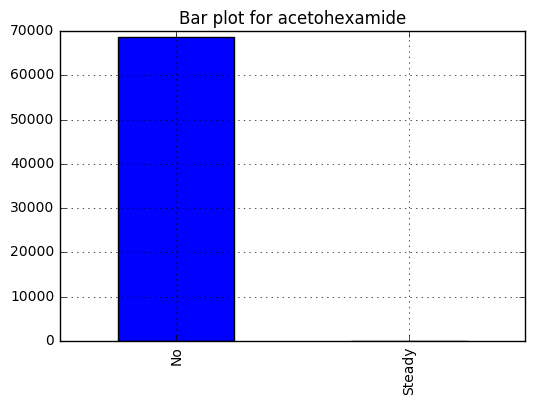

In [25]:
#Dropping columns which have only 1 unique value -- acetohexamide,examide,citoglipton,glimepiride-pioglitazone
#All values in the column correspond to NO

diabetic_df.acetohexamide.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for acetohexamide')

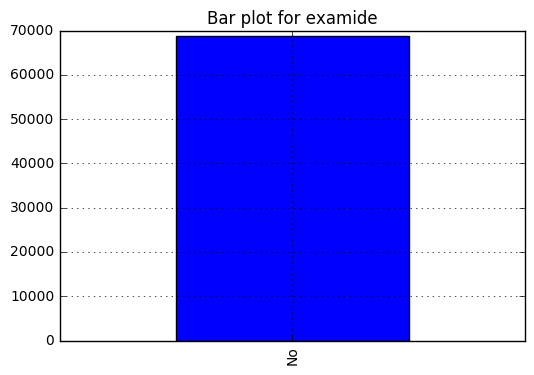

In [26]:
diabetic_df.examide.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for examide')

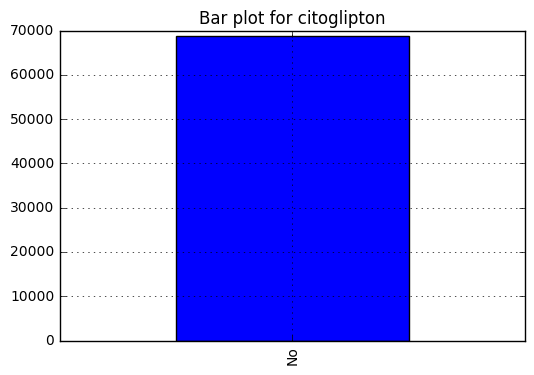

In [27]:
diabetic_df.citoglipton.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for citoglipton')

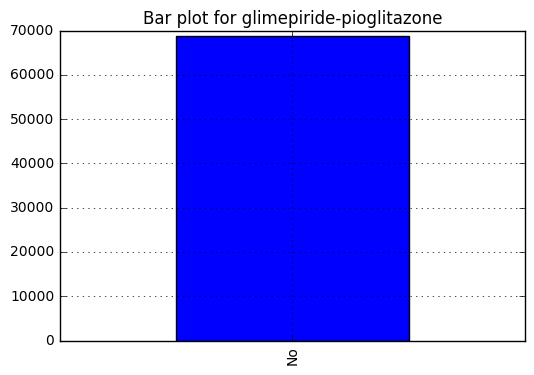

In [28]:
diabetic_df['glimepiride-pioglitazone'].value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for glimepiride-pioglitazone')

In [29]:
diabetic_df.shape

(68689, 48)

In [30]:
diabetic_df = diabetic_df.drop(['acetohexamide','examide','citoglipton','glimepiride-pioglitazone'],axis=1)
diabetic_df.shape

(68689, 44)

In [31]:
#Dropping patient_nbr and encounter_id as every instance is unique and they don't contribute to the outcome of the target variable
diabetic_df.drop(['encounter_id','patient_nbr'],axis=1,inplace=True)
diabetic_df.shape

(68689, 42)

### Examining the Target Variable

In [32]:
#Examining the outcome variable
diabetic_df.readmitted.value_counts()

NO     40534
>30    21944
<30     6211
Name: readmitted, dtype: int64

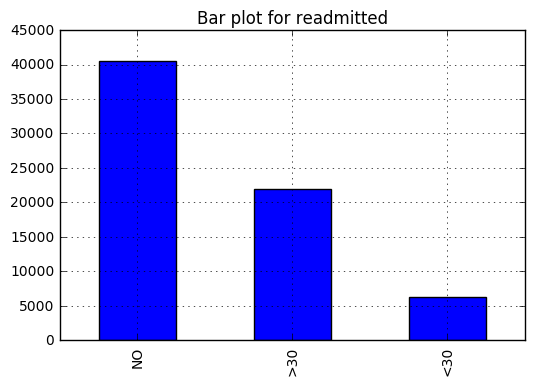

In [33]:
diabetic_df.readmitted.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for readmitted')

Defining the readmission attribute (outcome) as having two values: "readmitted" if the patient was readmitted within 30 days of discharge or “NO,” includes cases with no readmission at all or >30 days

In [34]:
diabetic_df['readmitted'].replace('>30','NO',inplace=True)

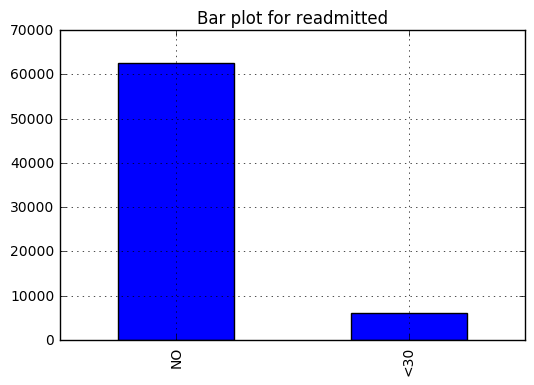

In [35]:
diabetic_df.readmitted.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for readmitted')

In [36]:
diabetic_df.shape

(68689, 42)

In [37]:
df_Y = diabetic_df['readmitted']
df_Y.shape

(68689,)

In [38]:
df_X = diabetic_df.drop('readmitted',inplace=False,axis=1)
df_X.shape

(68689, 41)

In [39]:
df_X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
1,Caucasian,Female,[10-20),1,1,7,3,missing,59,0,18,0,0,0,276,250.01,255,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes
2,AfricanAmerican,Female,[20-30),1,1,7,2,missing,11,5,13,2,0,1,648,250,V27,6,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
3,Caucasian,Male,[30-40),1,1,7,2,missing,44,1,16,0,0,0,8,250.43,403,7,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Up,No,No,No,No,Ch,Yes
4,Caucasian,Male,[40-50),1,1,7,1,missing,51,0,8,0,0,0,197,157,250,5,None,None,No,No,No,No,No,Steady,No,No,No,No,No,No,No,No,Steady,No,No,No,No,Ch,Yes
5,Caucasian,Male,[50-60),2,1,2,3,missing,31,6,16,0,0,0,414,411,250,9,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Steady,No,No,No,No,No,Yes


In [40]:
df_X.describe(include=[np.object])

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689
unique,6,3,10,71,692,716,756,4,4,4,4,4,4,4,4,4,2,4,4,3,4,2,2,4,4,2,2,2,2,2
top,Caucasian,Female,[70-80),missing,414,250,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
freq,51439,36587,17610,33266,5180,4556,8965,65416,56229,54038,67778,68202,68620,65033,59784,61028,68672,63493,64082,68492,68669,68686,68661,33751,68202,68682,68687,68688,37742,52281


## Data Exploration

#### Multivariate Correlation matrix plot

In [41]:
df_X.corr()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
admission_type_id,1.000000,0.095754,0.119964,-0.017352,-0.113948,0.136055,0.098221,0.037456,-0.018437,0.040719,-0.119517
discharge_disposition_id,0.095754,1.000000,-0.003466,0.162395,0.013001,0.017789,0.112115,-0.018883,-0.027145,-0.026900,0.027851
admission_source_id,0.119964,-0.003466,1.000000,0.006731,0.091793,-0.130413,-0.060320,0.018014,0.055110,0.030790,0.068803
time_in_hospital,-0.017352,0.162395,0.006731,1.000000,0.333278,0.185237,0.465407,-0.016902,-0.010306,0.062818,0.223240
num_lab_procedures,-0.113948,0.013001,0.091793,0.333278,1.000000,0.043593,0.260065,-0.008149,0.015834,0.079502,0.152095
num_procedures,0.136055,0.017789,-0.130413,0.185237,0.043593,1.000000,0.397428,-0.020661,-0.035857,-0.025142,0.069590
num_medications,0.098221,0.112115,-0.060320,0.465407,0.260065,0.397428,1.000000,0.024918,0.002316,0.037252,0.239187
number_outpatient,0.037456,-0.018883,0.018014,-0.016902,-0.008149,-0.020661,0.024918,1.000000,0.094777,0.068728,0.075380
number_emergency,-0.018437,-0.027145,0.055110,-0.010306,0.015834,-0.035857,0.002316,0.094777,1.000000,0.148964,0.050960
number_inpatient,0.040719,-0.026900,0.030790,0.062818,0.079502,-0.025142,0.037252,0.068728,0.148964,1.000000,0.066779


Populating the interactive namespace from numpy and matplotlib


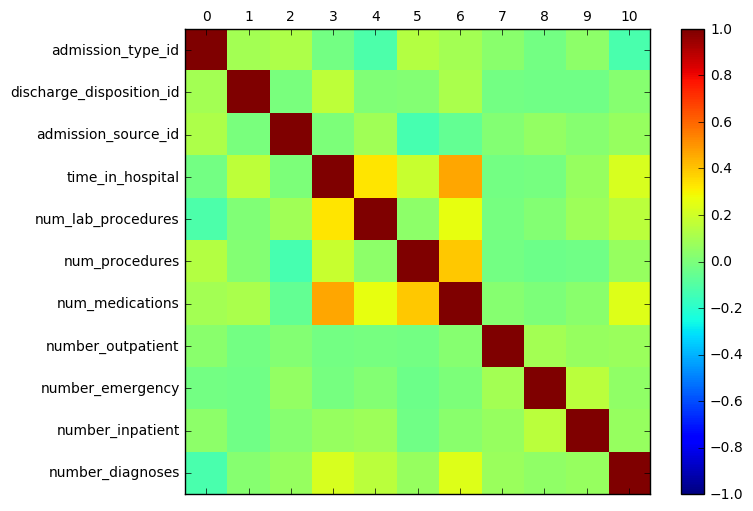

In [42]:
%pylab inline
pylab.rcParams['figure.figsize'] = (8,6)

col_names = ['admission_type_id','discharge_disposition_id','admission_source_id','time_in_hospital','num_lab_procedures','num_procedures','num_medications','number_outpatient','number_emergency','number_inpatient','number_diagnoses']
#Correlation matrix plot for all numeric variables
correlations = df_X.corr()
# plot correlation matrix
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(correlations, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_yticklabels(col_names)
plt.show()

In [43]:
%pylab inline
pylab.rcParams['figure.figsize'] = (12,10)

Populating the interactive namespace from numpy and matplotlib


### Univariate Histograms

The histogram results are interesting because many machine learning techniques assume a Gaussian univariate distribution on the input variables. Some attributes like number_lab_procedures, number_inpatient, time_in hospital may have a Gaussian or nearly Gaussian skewed distribution and others like num_procedures may have a bimodal distribution.

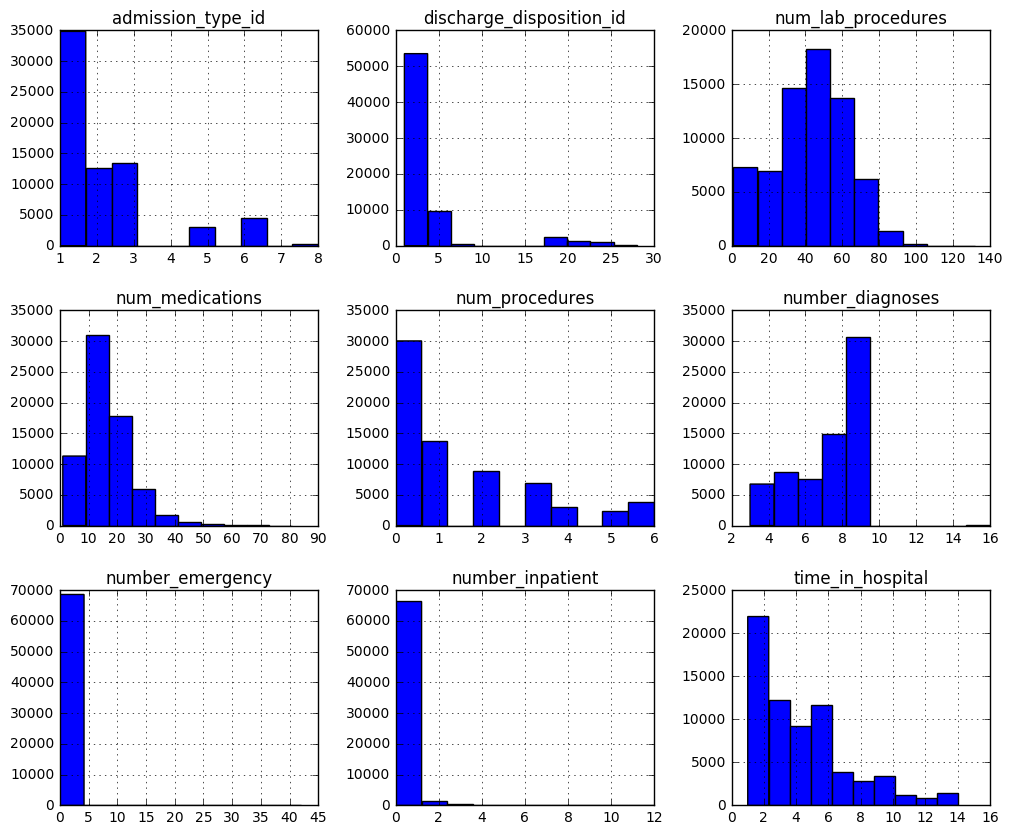

In [44]:
# Univariate Histograms
df_X_sub = df_X.drop(['admission_source_id','number_outpatient'],axis=1,inplace=False)
df_X_sub.hist()
plt.show()

### Univariate Density Plots

Density plots are another way of getting a quick idea of the distribution of each attribute and are displayed. The distribution of each attribute is clearer than histograms

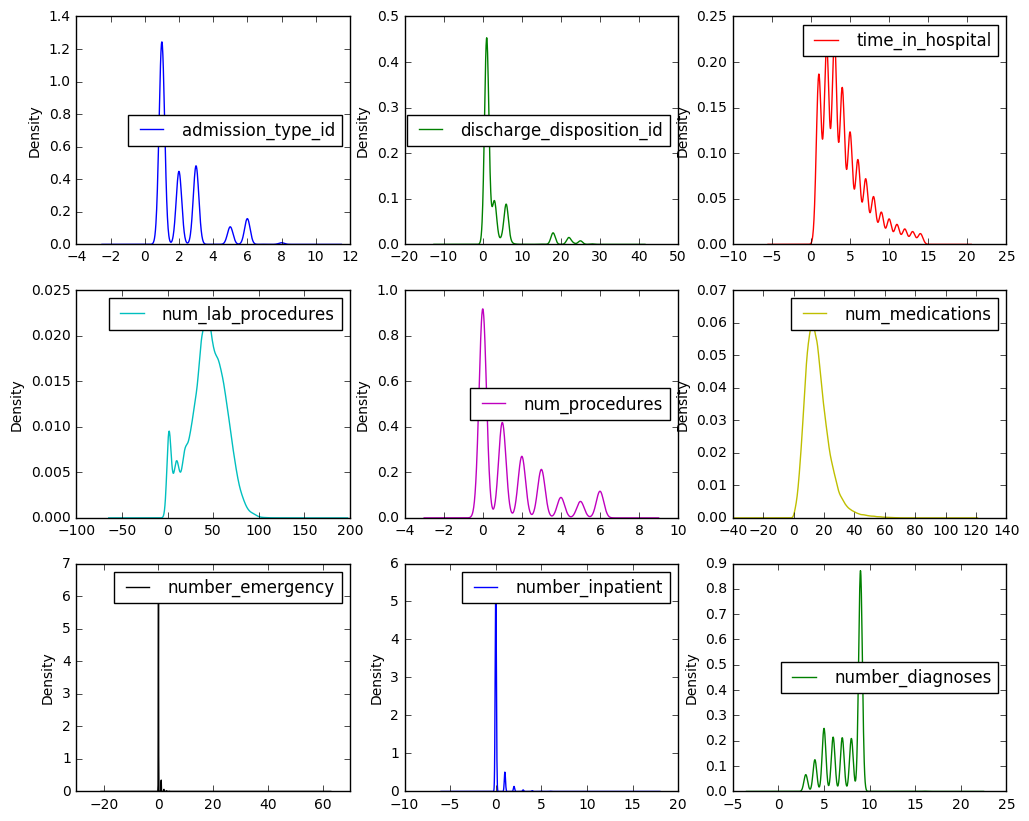

In [45]:

df_X_sub.plot(kind='density',subplots=True, layout=(3,3), sharex=False)
plt.show()

### Univariate Box and whisker plots

Box and whisker plots were used to understand the spread of the variable and detect outliers and are displayed. The spread of attributes is quite different. For time in hospital, it can be observed that most patients within 1-6 days and very few patients have stayed in the hospital for longer than 12 days. Some attributes like number_inpatient and number_emergency are quite skewed with smaller values.

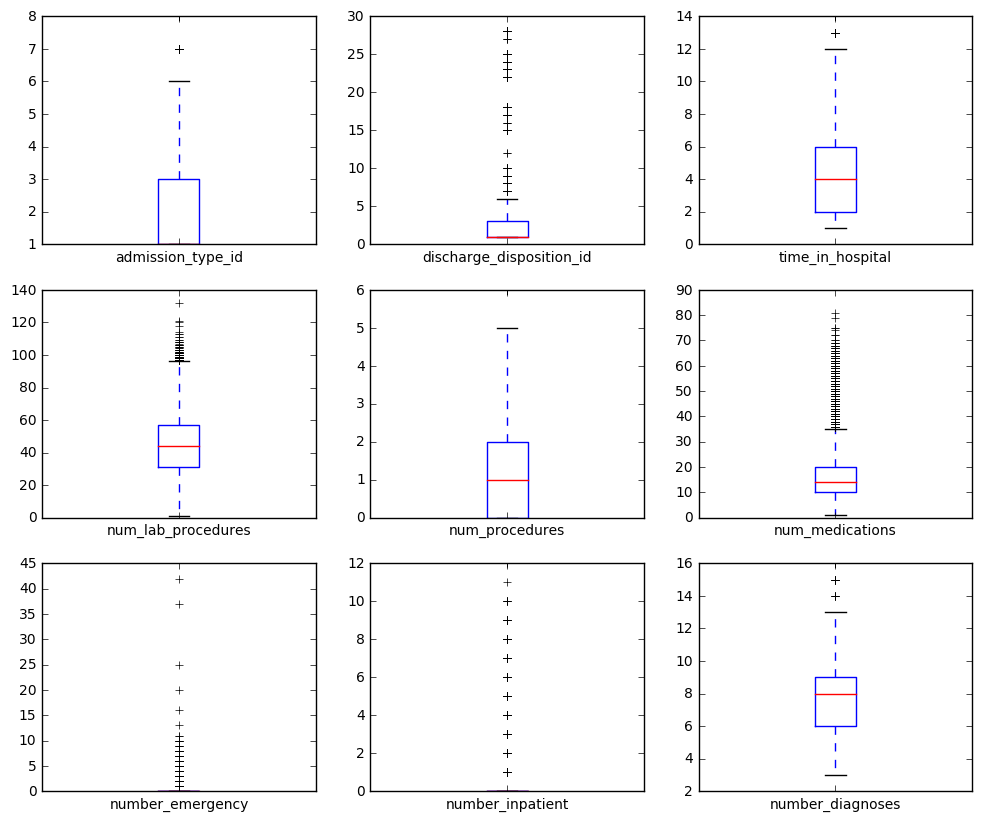

In [46]:
df_X_sub.plot(kind='box', subplots=True, layout=(3,3), sharex=False, sharey=False)
plt.show()

### Multivariate Scatter matrix

In [47]:
%pylab inline
pylab.rcParams['figure.figsize'] = (14,12)

Populating the interactive namespace from numpy and matplotlib


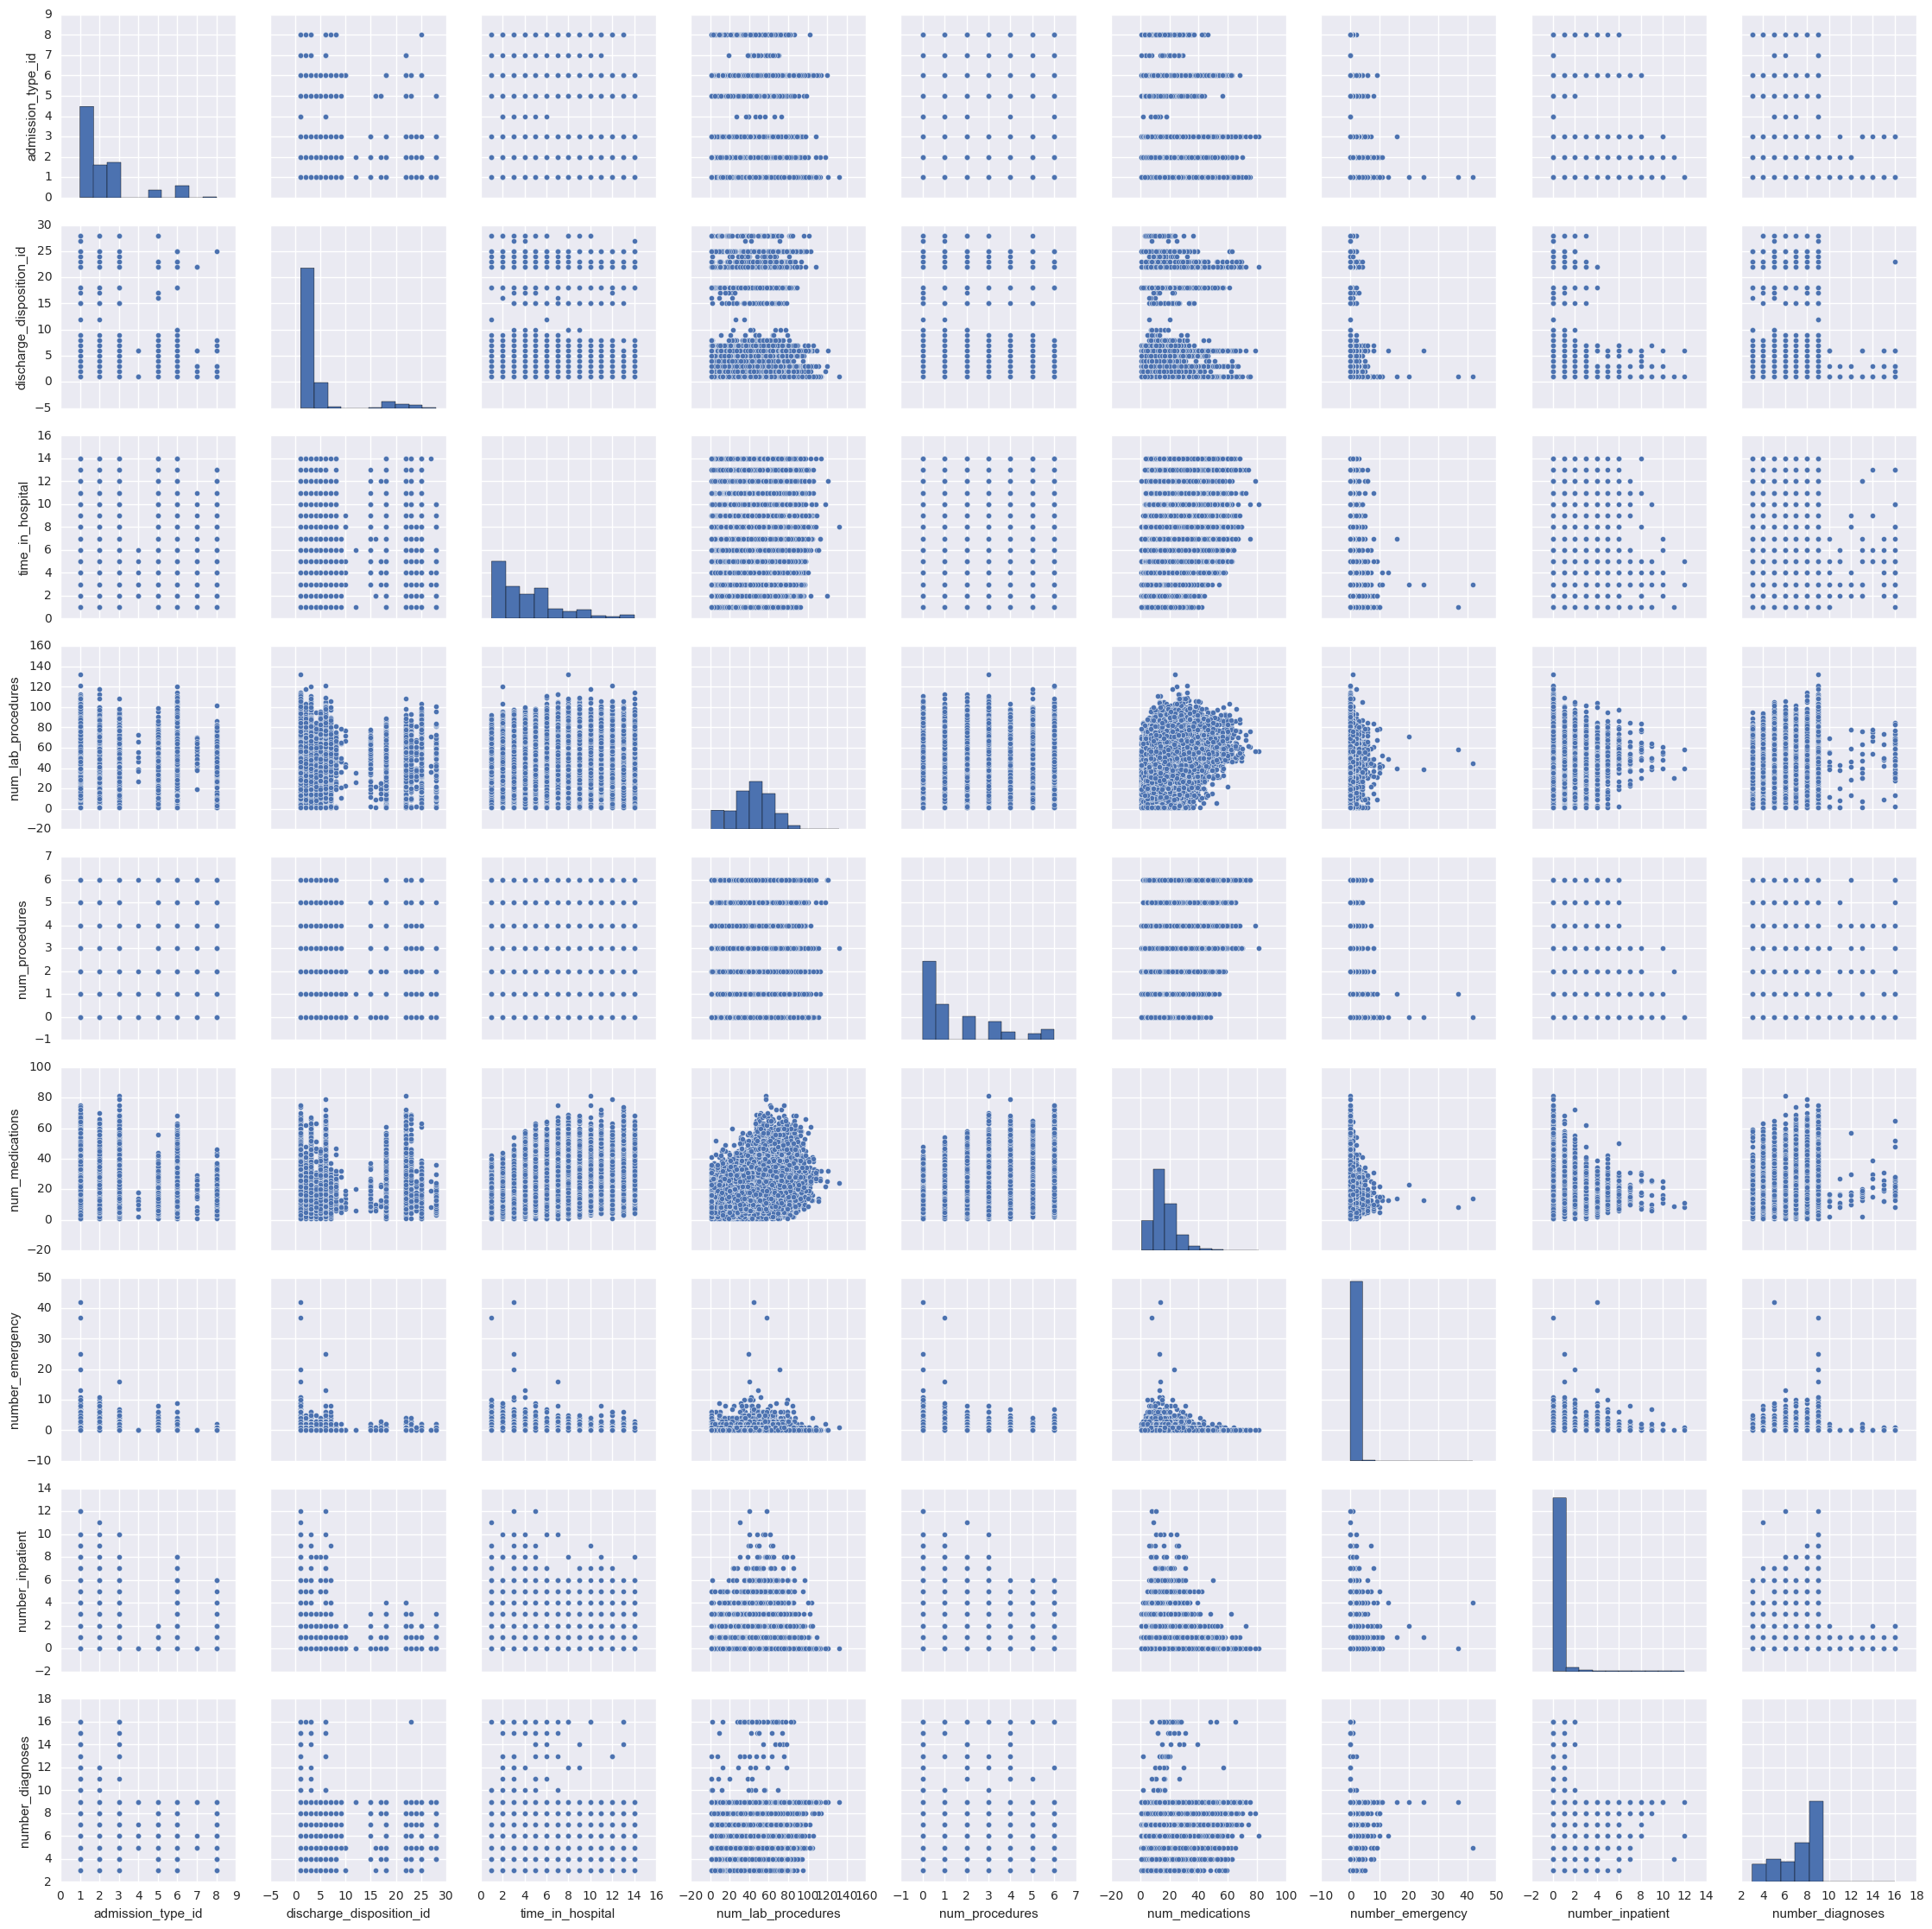

In [48]:
#provides a high-level interface to draw statistical graphics.
import seaborn as sns
sns.set()

sns.pairplot(df_X_sub)

### Visualizations for Categorical data

In [49]:
df_X.describe(include=[np.object])

,race,gender,age,medical_specialty,diag_1,diag_2,diag_3,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
count,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689,68689
unique,6,3,10,71,692,716,756,4,4,4,4,4,4,4,4,4,2,4,4,3,4,2,2,4,4,2,2,2,2,2
top,Caucasian,Female,[70-80),missing,414,250,250,None,None,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,No,Yes
freq,51439,36587,17610,33266,5180,4556,8965,65416,56229,54038,67778,68202,68620,65033,59784,61028,68672,63493,64082,68492,68669,68686,68661,33751,68202,68682,68687,68688,37742,52281


Populating the interactive namespace from numpy and matplotlib


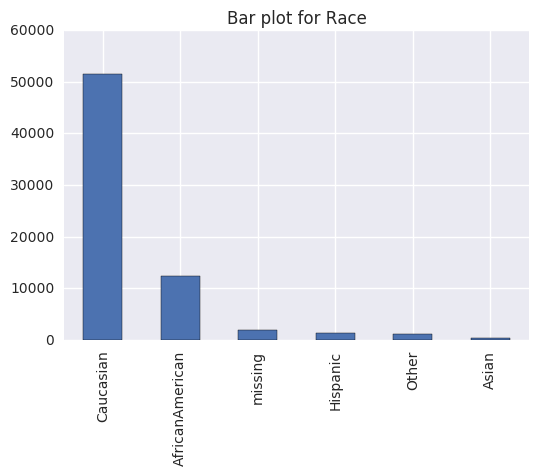

In [50]:
%pylab inline
pylab.rcParams['figure.figsize'] = (6,4)
#Bar plot for Race attribute
df_X.race.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for Race')

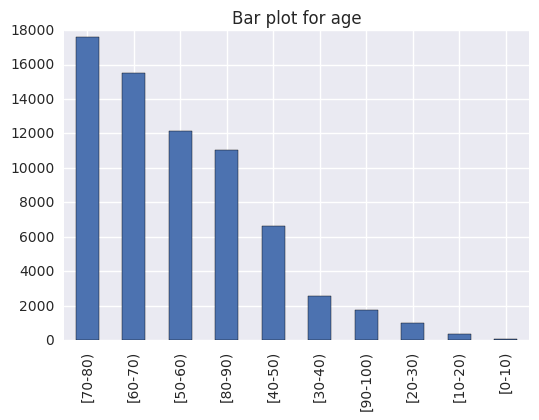

In [51]:
df_X.age.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for age')

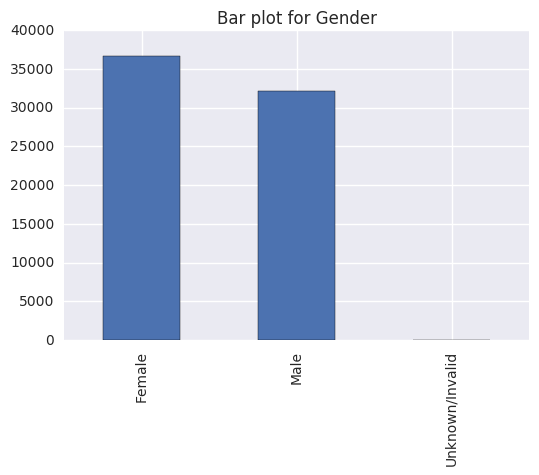

In [52]:
df_X.gender.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for Gender')

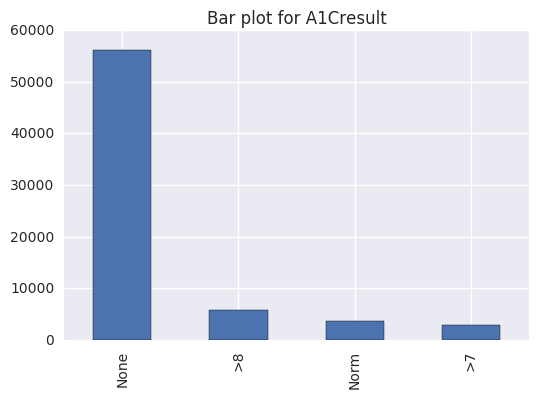

In [53]:
#4 different values
df_X.A1Cresult.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for A1Cresult')

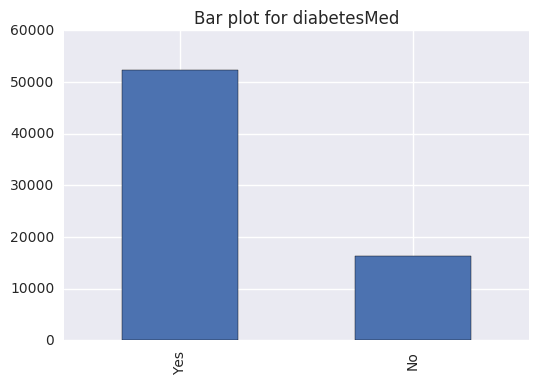

In [54]:
df_X.diabetesMed.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for diabetesMed')

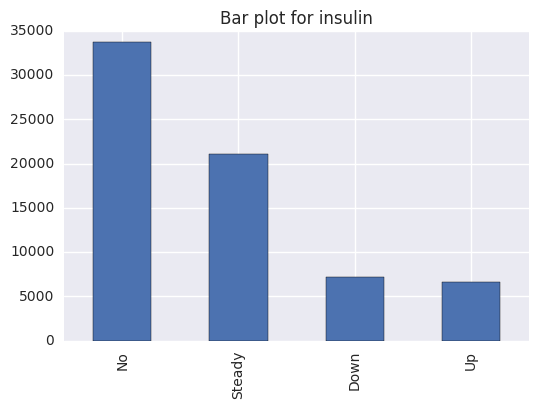

In [55]:
df_X.insulin.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for insulin')

Populating the interactive namespace from numpy and matplotlib


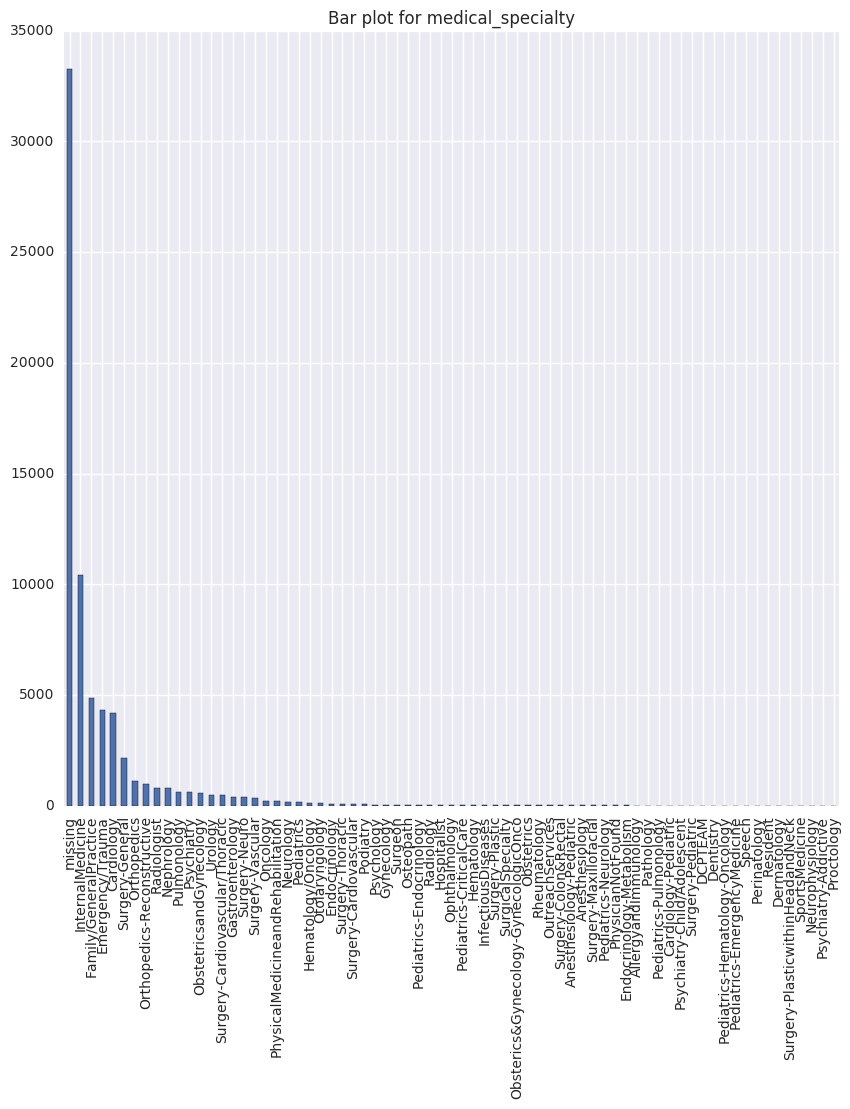

In [56]:
%pylab inline
pylab.rcParams['figure.figsize'] = (10,10)
df_X.medical_specialty.value_counts().plot(kind='bar',grid=True)
plt.title('Bar plot for medical_specialty')

In [57]:
#Taking a look at the distirbutions of numerical attributes when grouped over categorical attributes
df_X.groupby("A1Cresult").mean()

,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,number_diagnoses
A1Cresult,,,,,,,,,,,
>7,1.916227,3.369236,5.622668,4.804294,53.344245,1.369588,16.550862,0.256600,0.068638,0.111228,7.563182
>8,1.984317,3.304216,5.923103,4.743339,55.317538,1.360708,16.115852,0.222091,0.112985,0.141990,7.104553
None,2.152003,3.449074,5.608334,4.193032,40.407672,1.459229,15.676484,0.297284,0.105746,0.189066,7.306852
Norm,1.747628,3.309027,5.703714,4.866359,54.191922,1.329086,16.265112,0.173760,0.099214,0.119545,7.569802


In [58]:
#A1Cresult + Race
tab1=pd.crosstab(df_X["A1Cresult"],df_X["race"])
tab1

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other,missing
A1Cresult,,,,,,
>7,407,28,2203,76,58,69
>8,1292,47,4048,198,118,227
None,9862,373,42555,1078,883,1478
Norm,788,27,2633,100,70,71


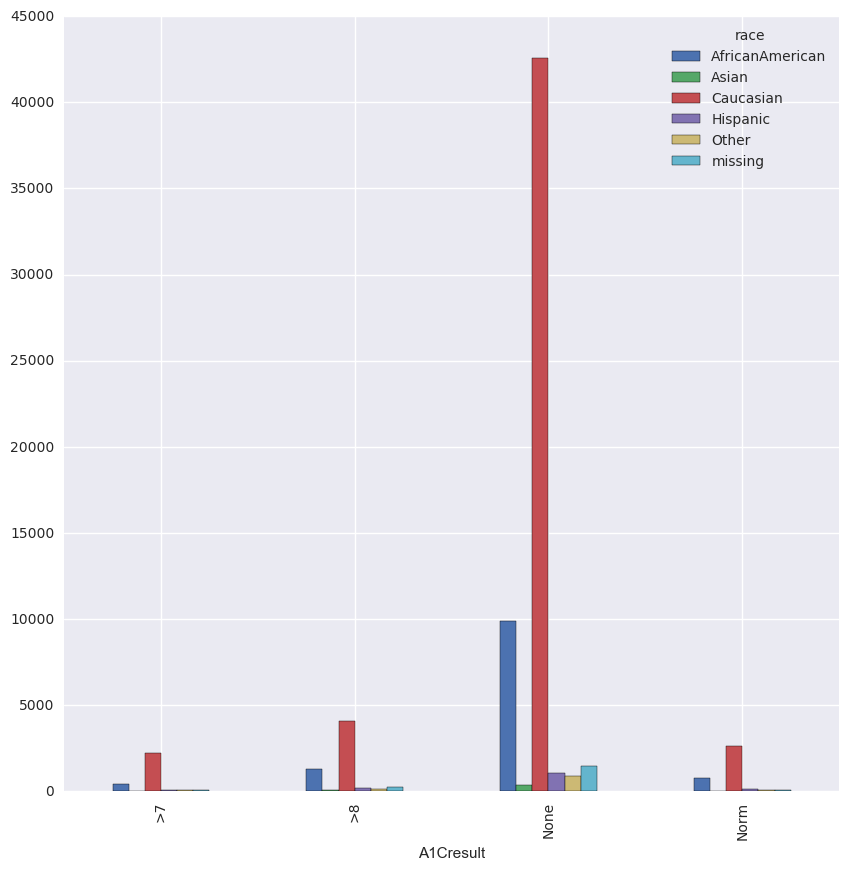

In [59]:
tab1.plot.bar()

In [60]:
#A1Cresult + Readmitted
tab3=pd.crosstab(df_X["A1Cresult"],df_Y)
tab3

readmitted,<30,NO
A1Cresult,,
>7,244,2597
>8,496,5434
None,5150,51079
Norm,321,3368


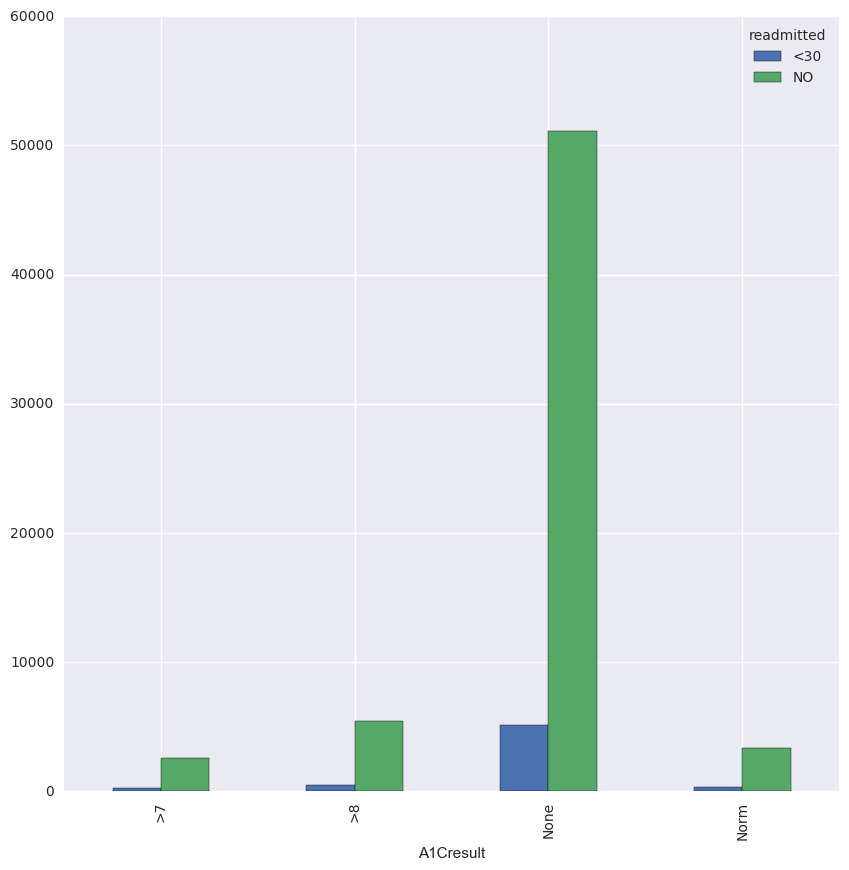

In [61]:
tab3.plot.bar()

In [62]:
#age + Readmitted
tab5=pd.crosstab(df_Y,df_X["age"])
tab5

age,[0-10),[10-20),[20-30),[30-40),[40-50),[50-60),[60-70),[70-80),[80-90),[90-100)
readmitted,,,,,,,,,,
<30,1,20,78,180,497,873,1404,1807,1185,166
NO,62,322,937,2383,6138,11290,14119,15803,9835,1589


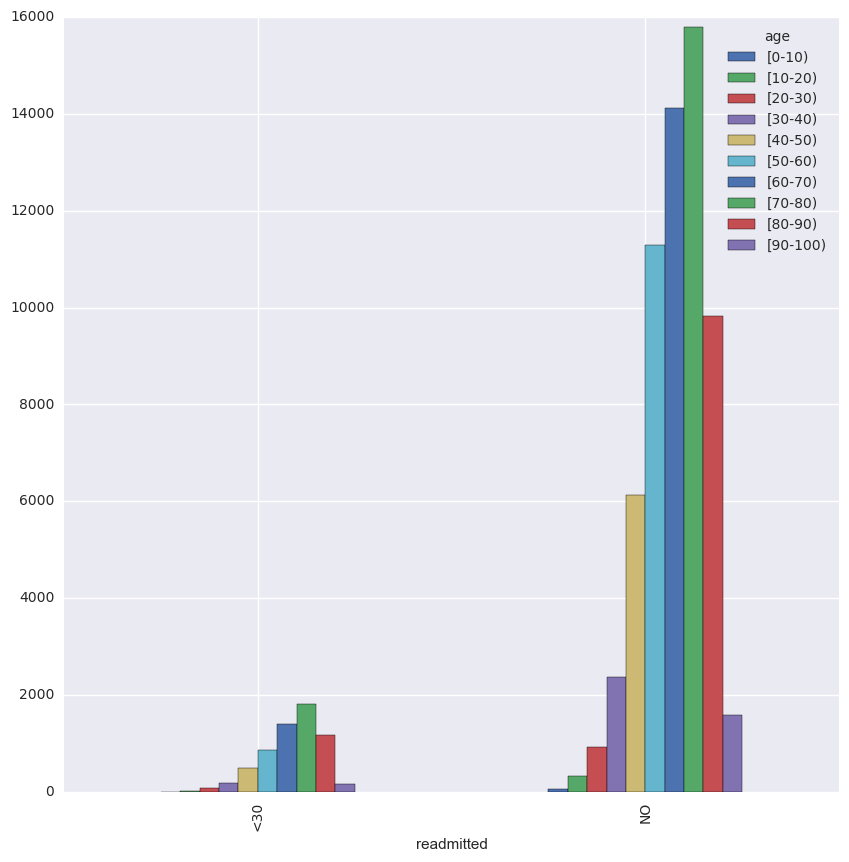

In [63]:
tab5.plot.bar()

In [64]:
#age + Readmitted
tab5=pd.crosstab(df_Y,df_X["race"])
tab5

race,AfricanAmerican,Asian,Caucasian,Hispanic,Other,missing
readmitted,,,,,,
<30,1083,41,4756,118,76,137
NO,11266,434,46683,1334,1053,1708


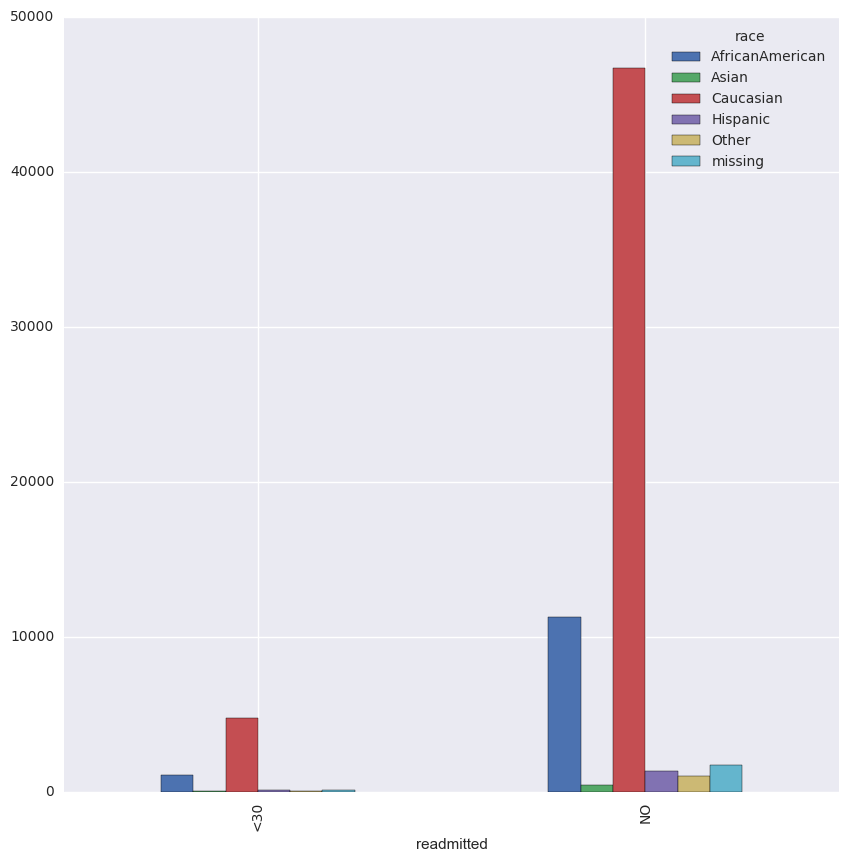

In [65]:
tab5.plot.bar()

In [66]:
#insulin + Readmitted
tab5=pd.crosstab(df_Y,df_X["insulin"])
tab5

insulin,Down,No,Steady,Up
readmitted,,,,
<30,765,2809,1980,657
NO,6406,30942,19144,5986


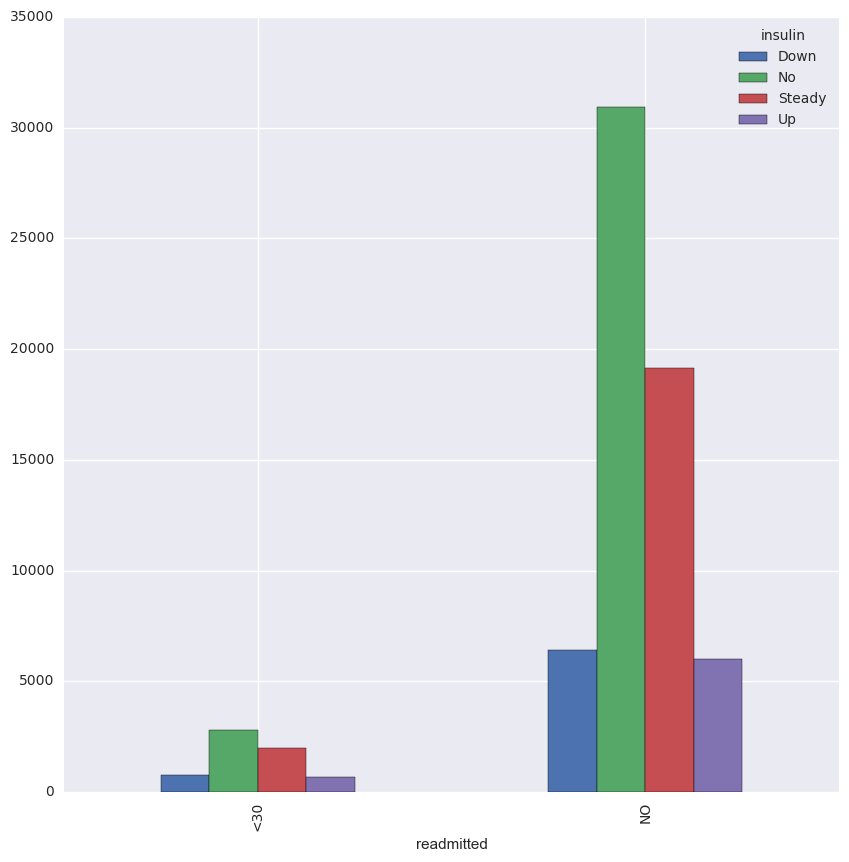

In [67]:
tab5.plot.bar()

In [68]:
#gender + Readmitted
tab6=pd.crosstab(df_Y,df_X["gender"])
tab6

gender,Female,Male,Unknown/Invalid
readmitted,,,
<30,3329,2882,0
NO,33258,29217,3


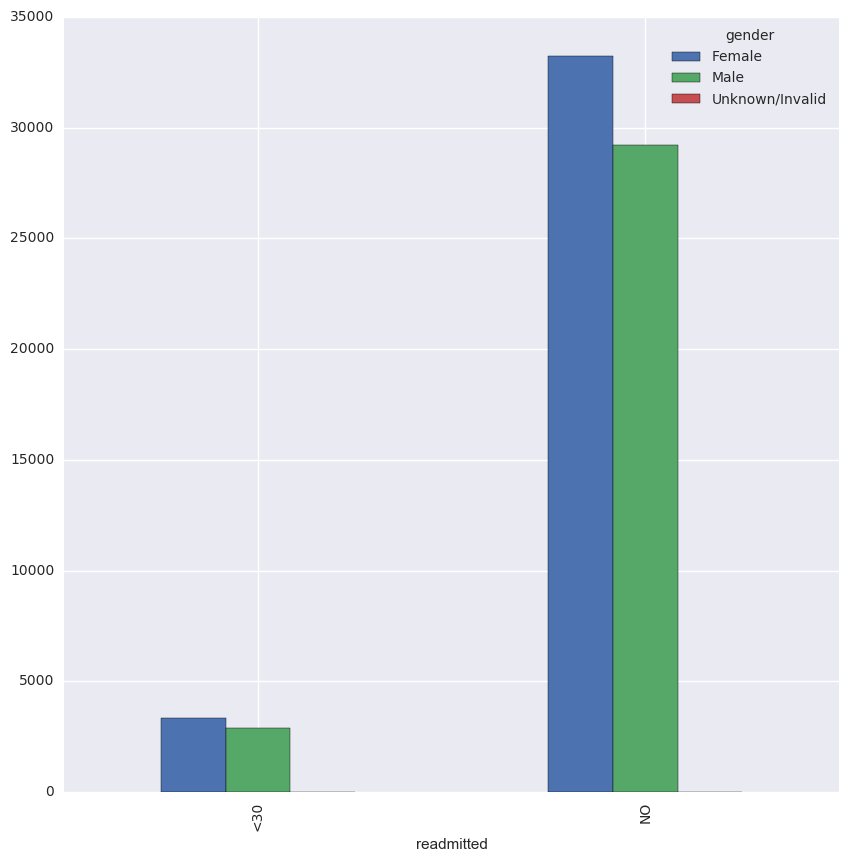

In [69]:
tab6.plot.bar()

## Using Label Encoder to convert categorical to nominal categorical variables for further processing

In [41]:
#Using Label Encoder to convert categorical to nominal categorical variables for further processing
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(df_X['race'])
df_X['race']= le.transform(df_X['race'])

le.fit(df_X['gender'])
df_X['gender']= le.transform(df_X['gender'])

le.fit(df_X['age'])
df_X['age']= le.transform(df_X['age'])

le.fit(df_X['medical_specialty'])
df_X['medical_specialty']= le.transform(df_X['medical_specialty'])

le.fit(df_X['diag_1'])
df_X['diag_1']= le.transform(df_X['diag_1'])

le.fit(df_X['diag_2'])
df_X['diag_2']= le.transform(df_X['diag_2'])

le.fit(df_X['diag_3'])
df_X['diag_3']= le.transform(df_X['diag_3'])

le.fit(df_X['max_glu_serum'])
df_X['max_glu_serum']= le.transform(df_X['max_glu_serum'])

le.fit(df_X['A1Cresult'])
df_X['A1Cresult']= le.transform(df_X['A1Cresult'])

le.fit(df_X['metformin'])
df_X['metformin']= le.transform(df_X['metformin'])

le.fit(df_X['glipizide'])
df_X['glipizide']= le.transform(df_X['glipizide'])

le.fit(df_X['glyburide'])
df_X['glyburide']= le.transform(df_X['glyburide'])

le.fit(df_X['insulin'])
df_X['insulin']= le.transform(df_X['insulin'])

le.fit(df_X['change'])
df_X['change']= le.transform(df_X['change'])

le.fit(df_X['diabetesMed'])
df_X['diabetesMed']= le.transform(df_X['diabetesMed'])

le.fit(df_X['repaglinide'])
df_X['repaglinide']= le.transform(df_X['repaglinide'])

le.fit(df_X['nateglinide'])
df_X['nateglinide']= le.transform(df_X['nateglinide'])

le.fit(df_X['chlorpropamide'])
df_X['chlorpropamide']= le.transform(df_X['chlorpropamide'])

le.fit(df_X['glimepiride'])
df_X['glimepiride']= le.transform(df_X['glimepiride'])

le.fit(df_X['tolbutamide'])
df_X['tolbutamide']= le.transform(df_X['tolbutamide'])

le.fit(df_X['pioglitazone'])
df_X['pioglitazone']= le.transform(df_X['pioglitazone'])

le.fit(df_X['rosiglitazone'])
df_X['rosiglitazone']= le.transform(df_X['rosiglitazone'])

le.fit(df_X['acarbose'])
df_X['acarbose']= le.transform(df_X['acarbose'])

le.fit(df_X['miglitol'])
df_X['miglitol']= le.transform(df_X['miglitol'])

le.fit(df_X['troglitazone'])
df_X['troglitazone']= le.transform(df_X['troglitazone'])

le.fit(df_X['tolazamide'])
df_X['tolazamide']= le.transform(df_X['tolazamide'])

le.fit(df_X['glyburide-metformin'])
df_X['glyburide-metformin']= le.transform(df_X['glyburide-metformin'])

le.fit(df_X['glipizide-metformin'])
df_X['glipizide-metformin']= le.transform(df_X['glipizide-metformin'])

le.fit(df_X['metformin-rosiglitazone'])
df_X['metformin-rosiglitazone']= le.transform(df_X['metformin-rosiglitazone'])

le.fit(df_X['metformin-pioglitazone'])
df_X['metformin-pioglitazone']= le.transform(df_X['metformin-pioglitazone'])

df_X.dtypes

race                        int64
gender                      int64
age                         int64
admission_type_id           int64
discharge_disposition_id    int64
admission_source_id         int64
time_in_hospital            int64
medical_specialty           int64
num_lab_procedures          int64
num_procedures              int64
num_medications             int64
number_outpatient           int64
number_emergency            int64
number_inpatient            int64
diag_1                      int64
diag_2                      int64
diag_3                      int64
number_diagnoses            int64
max_glu_serum               int64
A1Cresult                   int64
metformin                   int64
repaglinide                 int64
nateglinide                 int64
chlorpropamide              int64
glimepiride                 int64
glipizide                   int64
glyburide                   int64
tolbutamide                 int64
pioglitazone                int64
rosiglitazone 

In [71]:
df_X.get_dtype_counts()

int64    41
dtype: int64

In [42]:
#Label encoding for the target variable
le.fit(df_Y)
df_Yarray= le.transform(df_Y)

df_Yarray[0:20]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1])

In [43]:
df_X.head()

,race,gender,age,admission_type_id,discharge_disposition_id,admission_source_id,time_in_hospital,medical_specialty,num_lab_procedures,num_procedures,num_medications,number_outpatient,number_emergency,number_inpatient,diag_1,diag_2,diag_3,number_diagnoses,max_glu_serum,A1Cresult,metformin,repaglinide,nateglinide,chlorpropamide,glimepiride,glipizide,glyburide,tolbutamide,pioglitazone,rosiglitazone,acarbose,miglitol,troglitazone,tolazamide,insulin,glyburide-metformin,glipizide-metformin,metformin-rosiglitazone,metformin-pioglitazone,change,diabetesMed
1,2,0,1,1,1,7,3,70,59,0,18,0,0,0,141,75,112,9,2,2,1,1,1,1,1,1,1,0,1,1,0,1,0,0,3,1,0,0,0,0,1
2,0,0,2,1,1,7,2,70,11,5,13,2,0,1,443,74,733,6,2,2,1,1,1,1,1,2,1,0,1,1,0,1,0,0,1,1,0,0,0,1,1
3,2,1,3,1,1,7,2,70,44,1,16,0,0,0,541,90,238,7,2,2,1,1,1,1,1,1,1,0,1,1,0,1,0,0,3,1,0,0,0,0,1
4,2,1,4,1,1,7,1,70,51,0,8,0,0,0,54,21,77,5,2,2,1,1,1,1,1,2,1,0,1,1,0,1,0,0,2,1,0,0,0,0,1
5,2,1,5,2,1,2,3,70,31,6,16,0,0,0,257,235,77,9,2,2,1,1,1,1,1,1,1,0,1,1,0,1,0,0,2,1,0,0,0,1,1


## Classification - Model building and evaluation

### Ensemble classifier - Random forest

Feature ranking:
1. feature 4 (0.151668)
2. feature 13 (0.099508)
3. feature 14 (0.082179)
4. feature 8 (0.070694)
5. feature 15 (0.064421)
6. feature 10 (0.063866)
7. feature 16 (0.063765)
8. feature 6 (0.061412)
9. feature 2 (0.051155)
10. feature 17 (0.038194)
11. feature 7 (0.032515)
12. feature 9 (0.026240)
13. feature 3 (0.021225)
14. feature 5 (0.018069)
15. feature 0 (0.017069)
16. feature 34 (0.016195)
17. feature 12 (0.015937)
18. feature 11 (0.014192)
19. feature 40 (0.014010)
20. feature 19 (0.012812)
21. feature 20 (0.010937)
22. feature 1 (0.009735)
23. feature 39 (0.007578)
24. feature 25 (0.006900)
25. feature 18 (0.005770)
26. feature 26 (0.005552)
27. feature 28 (0.004857)
28. feature 29 (0.004723)
29. feature 24 (0.003727)
30. feature 21 (0.002585)
31. feature 35 (0.001049)
32. feature 22 (0.000948)
33. feature 30 (0.000410)
34. feature 23 (0.000099)
35. feature 33 (0.000004)
36. feature 27 (0.000000)
37. feature 31 (0.000000)
38. feature 32 (0.000000)
39. feature 36

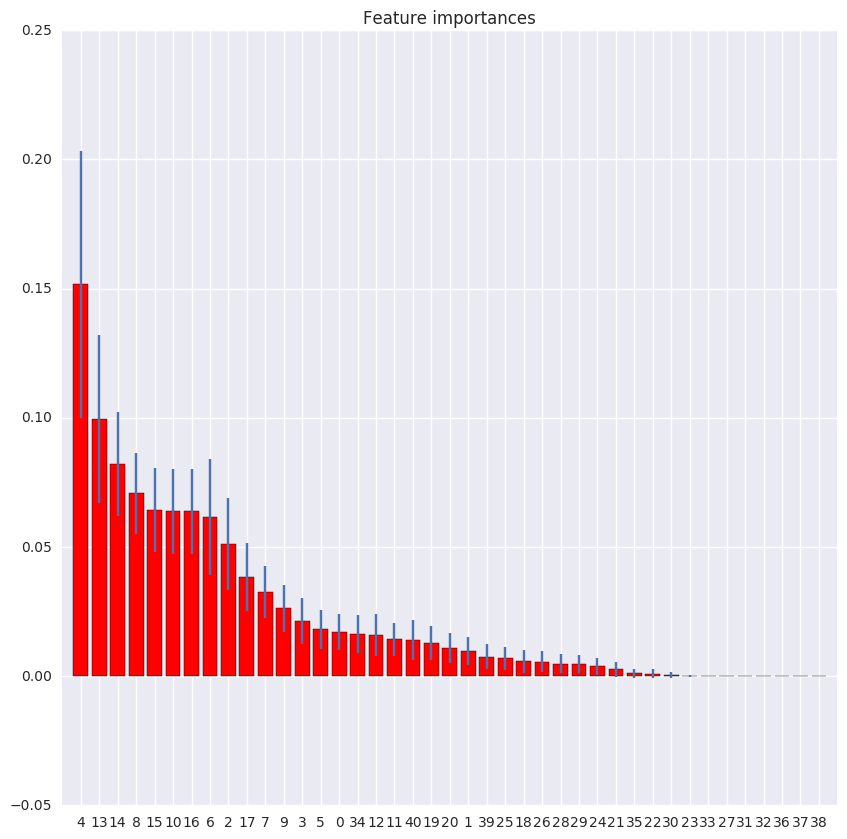

In [74]:
#Dataset with 41 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,criterion='entropy',class_weight='balanced_subsample',max_depth=10, min_samples_leaf=10)
forest = forest.fit(df_X, df_Y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_X.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_X.shape[1]), indices)
plt.xlim([-1, df_X.shape[1]])
plt.show()

In [75]:
#Selecting the best 21 features by specifying the threshold
df_X21 = forest.transform(df_X,threshold=0.010425)
df_X21.shape

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(68689, 21)

In [62]:
#Versatile function to measure performance of a model
from sklearn import metrics

def measure_performance(X, y, clf, show_accuracy=True, show_classification_report=True, show_confussion_matrix=True):
    y_pred = clf.predict(X)   
    if show_accuracy:
         print("Accuracy:{0:.3f}".format(metrics.accuracy_score(y, y_pred)),"\n")
    if show_classification_report:
        print ("Classification report")
        print (metrics.classification_report(y, y_pred),"\n")
      
    if show_confussion_matrix:
        print("Confussion matrix")
        print(metrics.confusion_matrix(y, y_pred),"\n")

In [77]:
#Evaluating performance with 41 features
measure_performance(df_X,df_Y,forest)

Accuracy:0.702 

Classification report
             precision    recall  f1-score   support

        <30       0.18      0.64      0.28      6211
         NO       0.95      0.71      0.81     62478

avg / total       0.88      0.70      0.76     68689
 

Confussion matrix
[[ 3967  2244]
 [18207 44271]] 



Feature ranking:
1. feature 3 (0.155758)
2. feature 12 (0.096627)
3. feature 13 (0.093977)
4. feature 7 (0.078891)
5. feature 14 (0.073360)
6. feature 15 (0.072341)
7. feature 9 (0.067713)
8. feature 5 (0.060765)
9. feature 1 (0.049952)
10. feature 16 (0.038781)
11. feature 6 (0.034924)
12. feature 8 (0.027882)
13. feature 2 (0.023428)
14. feature 4 (0.018782)
15. feature 19 (0.018408)
16. feature 0 (0.018375)
17. feature 11 (0.015920)
18. feature 10 (0.015447)
19. feature 20 (0.014386)
20. feature 17 (0.012755)
21. feature 18 (0.011528)


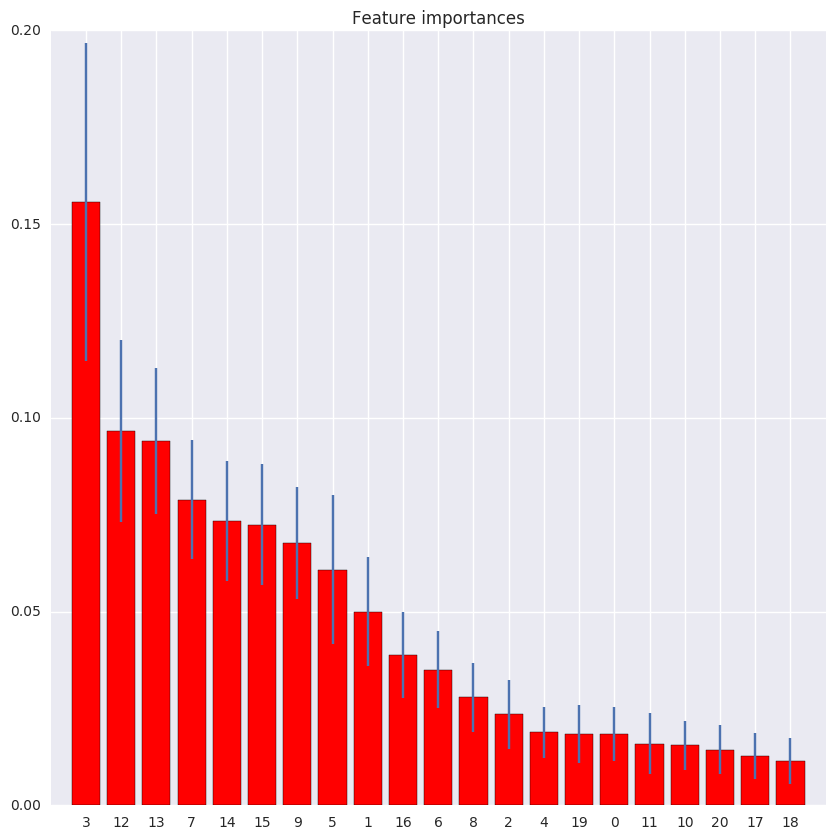

In [78]:
#Dataset with 21 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,criterion='entropy',class_weight='balanced_subsample',max_depth=10, min_samples_leaf=10)
forest = forest.fit(df_X21, df_Y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X21.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_X21.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_X21.shape[1]), indices)
plt.xlim([-1, df_X21.shape[1]])
plt.show()

In [79]:
#Selecting the best 11 features by specifying the threshold
df_X11 = forest.transform(df_X21,threshold=0.031264)
df_X11.shape

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(68689, 11)

In [80]:
#Evaluating performance with 21 features
measure_performance(df_X21,df_Y,forest)

Accuracy:0.715 

Classification report
             precision    recall  f1-score   support

        <30       0.19      0.64      0.29      6211
         NO       0.95      0.72      0.82     62478

avg / total       0.88      0.71      0.77     68689
 

Confussion matrix
[[ 3971  2240]
 [17342 45136]] 



Feature ranking:
1. feature 1 (0.178826)
2. feature 7 (0.123408)
3. feature 6 (0.105241)
4. feature 4 (0.100646)
5. feature 8 (0.096892)
6. feature 9 (0.093836)
7. feature 5 (0.086427)
8. feature 2 (0.068512)
9. feature 0 (0.054749)
10. feature 10 (0.045776)
11. feature 3 (0.045688)


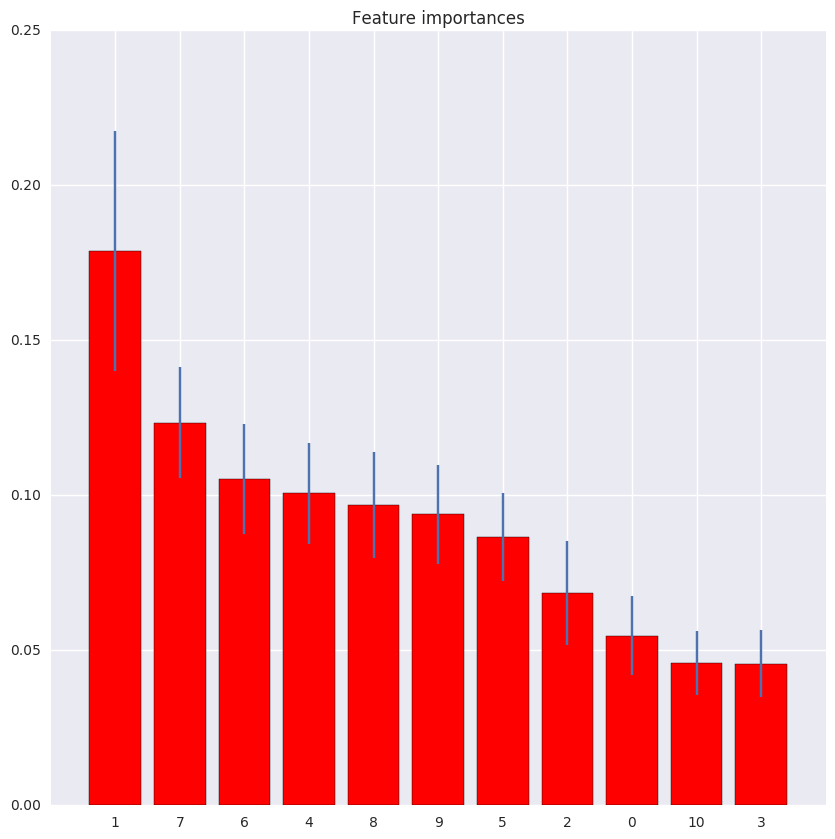

In [81]:
#Dataset with 11 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,criterion='entropy',class_weight='balanced_subsample',max_depth=10, min_samples_leaf=10)
forest = forest.fit(df_X11, df_Y)

importances = forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in forest.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X11.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(df_X11.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(df_X11.shape[1]), indices)
plt.xlim([-1, df_X11.shape[1]])
plt.show()

In [82]:
#Evaluating performance with 11 features
measure_performance(df_X11,df_Y,forest)

Accuracy:0.712 

Classification report
             precision    recall  f1-score   support

        <30       0.18      0.64      0.29      6211
         NO       0.95      0.72      0.82     62478

avg / total       0.88      0.71      0.77     68689
 

Confussion matrix
[[ 3948  2263]
 [17517 44961]] 



In [83]:
#Dataset with 20 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=500,criterion='gini',class_weight='balanced_subsample',max_depth=20, min_samples_leaf=5,min_samples_split=10)
forest = forest.fit(df_X21, df_Y)

In [84]:
measure_performance(df_X21, df_Y,forest)

Accuracy:0.986 

Classification report
             precision    recall  f1-score   support

        <30       0.94      0.91      0.92      6211
         NO       0.99      0.99      0.99     62478

avg / total       0.99      0.99      0.99     68689
 

Confussion matrix
[[ 5627   584]
 [  365 62113]] 



In [85]:
#Dataset with 20 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=1000,criterion='gini',class_weight='balanced_subsample',max_depth=20, min_samples_leaf=5,min_samples_split=10)
forest = forest.fit(df_X21, df_Y)

In [86]:
measure_performance(df_X21, df_Y,forest)

Accuracy:0.987 

Classification report
             precision    recall  f1-score   support

        <30       0.94      0.91      0.93      6211
         NO       0.99      0.99      0.99     62478

avg / total       0.99      0.99      0.99     68689
 

Confussion matrix
[[ 5660   551]
 [  361 62117]] 



In [87]:
#Dataset with 20 features
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(n_estimators=2000,criterion='gini',class_weight='balanced_subsample',max_depth=20, min_samples_leaf=5,min_samples_split=10)
forest = forest.fit(df_X21, df_Y)

In [88]:
measure_performance(df_X21, df_Y,forest)

Accuracy:0.987 

Classification report
             precision    recall  f1-score   support

        <30       0.94      0.91      0.93      6211
         NO       0.99      0.99      0.99     62478

avg / total       0.99      0.99      0.99     68689
 

Confussion matrix
[[ 5649   562]
 [  341 62137]] 



## Support Vector machine classifier

In [89]:
#Normalizing the input data using z-score normalization
from sklearn.preprocessing import scale

#fit and transform the data
df_XNorm= scale(df_X, axis=0, with_mean=True, with_std=True, copy=True)

np.set_printoptions(precision=2, linewidth=80, suppress=True)
df_XNorm[0:5]

array([[ 0.23, -0.94, -3.27, -0.73, -0.47,  0.33, -0.44,  0.91,  0.8 , -0.82,
         0.27, -0.26, -0.2 , -0.29, -1.23, -1.27, -0.89,  0.89,  0.04,  0.21,
        -0.47, -0.11, -0.08, -0.03, -0.21, -0.34, -0.31, -0.02, -0.27, -0.26,
        -0.05, -0.02, -0.01, -0.02,  2.  , -0.08, -0.01, -0.01, -0.  , -1.1 ,
         0.56],
       [-1.77, -0.94, -2.63, -0.73, -0.47,  0.33, -0.78,  0.91, -1.61,  2.02,
        -0.34,  1.6 , -0.2 ,  1.36,  0.73, -1.28,  2.72, -0.69,  0.04,  0.21,
        -0.47, -0.11, -0.08, -0.03, -0.21,  2.35, -0.31, -0.02, -0.27, -0.26,
        -0.05, -0.02, -0.01, -0.02, -0.5 , -0.08, -0.01, -0.01, -0.  ,  0.91,
         0.56],
       [ 0.23,  1.07, -1.98, -0.73, -0.47,  0.33, -0.78,  0.91,  0.05, -0.25,
         0.03, -0.26, -0.2 , -0.29,  1.37, -1.17, -0.16, -0.17,  0.04,  0.21,
        -0.47, -0.11, -0.08, -0.03, -0.21, -0.34, -0.31, -0.02, -0.27, -0.26,
        -0.05, -0.02, -0.01, -0.02,  2.  , -0.08, -0.01, -0.01, -0.  , -1.1 ,
         0.56],
       [ 0.23,  

In [90]:
#Build the training and testing dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_XNorm, df_Yarray, test_size=0.2, random_state=33)

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [91]:
X_train.shape

(54951, 41)

In [92]:
X_test.shape

(13738, 41)

In [93]:
y_train

array([1, 1, 1, ..., 1, 0, 1])

In [94]:
from sklearn.svm import SVC
# create a base classifier used to evaluate a subset of attributes
model = SVC(C=1, kernel='linear',class_weight='balanced')
svm = model.fit(X_train, y_train)
svm.coef_

array([[ 0.01, -0.01, -0.14,  0.01, -0.35,  0.  , -0.25, -0.01, -0.04,  0.01,
         0.02, -0.03, -0.13, -0.36,  0.02,  0.03, -0.  , -0.08,  0.05, -0.04,
         0.09, -0.06,  0.03,  0.03,  0.06,  0.03,  0.04,  0.01,  0.03, -0.  ,
         0.01,  0.01,  0.02,  0.01,  0.04,  0.03,  0.01,  0.01,  0.  ,  0.04,
        -0.13]])

In [95]:
#Accuracy with training data
measure_performance(X_train, y_train, svm)

Accuracy:0.717 

Classification report
             precision    recall  f1-score   support

          0       0.14      0.41      0.21      4987
          1       0.93      0.75      0.83     49964

avg / total       0.86      0.72      0.77     54951
 

Confussion matrix
[[ 2031  2956]
 [12611 37353]] 



In [ ]:
#Accuracy with testing data
measure_performance(X_test, y_test, svm)

Accuracy:0.716 

Classification report
             precision    recall  f1-score   support

          0       0.14      0.41      0.20      1224
          1       0.93      0.75      0.83     12514

avg / total       0.86      0.72      0.77     13738
 

Confussion matrix
[[ 499  725]
 [3172 9342]] 



Feature Selection using RFE

In [ ]:
from sklearn import feature_selection
from sklearn.svm import SVC
# Recursive Feature Elimination
# create a base classifier used to evaluate a subset of attributes
model = SVC(C=1, kernel='linear',class_weight='balanced')
# create the RFE model
rfe = feature_selection.RFE(model,20,step=1)
X_train_fs = rfe.fit_transform(X_train, y_train)
# summarize the selection of the attributes
print("Num Features: ",rfe.n_features_)
print("Selected Features: \n ", rfe.support_)
print("Feature Ranking: \n", rfe.ranking_)

In [ ]:
#Evaluate performance with the new feature set
model = SVC(C=1, kernel='linear',class_weight='balanced')
svm = model.fit(X_train_fs, y_train)

#measure performance for training data with 20 best features for the model
measure_performance(X_train_fs, y_train, svm)

In [ ]:
X_test_fs = rfe.transform(X_test)
measure_performance(X_test_fs, y_test, svm)

## Naive Bayes Classifer

In [63]:
#Build the training and testing dataset
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=33)

In [64]:
from sklearn.naive_bayes import MultinomialNB

clf = MultinomialNB()
# create a base classifier used with 41 attributes
clf = clf.fit(X_train, y_train)

In [65]:
measure_performance(X_train, y_train,clf)

Accuracy:0.749 

Classification report
             precision    recall  f1-score   support

        <30       0.12      0.28      0.17      4987
         NO       0.92      0.80      0.85     49964

avg / total       0.85      0.75      0.79     54951
 

Confussion matrix
[[ 1405  3582]
 [10193 39771]] 



In [66]:
measure_performance(X_test, y_test,clf)

Accuracy:0.753 

Classification report
             precision    recall  f1-score   support

        <30       0.12      0.28      0.17      1224
         NO       0.92      0.80      0.85     12514

avg / total       0.85      0.75      0.79     13738
 

Confussion matrix
[[ 345  879]
 [2516 9998]] 



In [67]:
from sklearn import feature_selection
from sklearn.naive_bayes import MultinomialNB
# Recursive Feature Elimination
# create a base classifier used to evaluate a subset of attributes
clf = MultinomialNB()
# create the RFE model
rfe = feature_selection.RFE(clf,20,step=1)
X_train_fs = rfe.fit_transform(X_train, y_train)
# summarize the selection of the attributes
print("Num Features: ",rfe.n_features_)
print("Selected Features: \n ", rfe.support_)
print("Feature Ranking: \n", rfe.ranking_)

Num Features:  20
Selected Features: 
  [False  True False False False False False False False False False  True  True
  True False False False False False False False  True  True  True  True False
 False  True False  True  True  True  True  True False  True  True  True  True
  True  True]
Feature Ranking: 
 [ 8  1 15 11 12 14 13 19 18  7 17  1  1  1 22 20 21 16 10  9  5  1  1  1  1  4
  3  1  2  1  1  1  1  1  6  1  1  1  1  1  1]


In [68]:
print(X_train_fs)

[[0 0 0 ..., 0 1 0]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 0 1]
 ..., 
 [0 0 0 ..., 0 1 1]
 [0 0 0 ..., 0 0 1]
 [0 0 0 ..., 0 1 0]]


In [69]:
#Evaluate performance with the new feature set - 20 features
clf = MultinomialNB()
nb = clf.fit(X_train_fs, y_train)

#measure performance for training data with 20 best features for the model
measure_performance(X_train_fs, y_train, nb)

Accuracy:0.905 

Classification report
             precision    recall  f1-score   support

        <30       0.28      0.03      0.05      4987
         NO       0.91      0.99      0.95     49964

avg / total       0.85      0.90      0.87     54951
 

Confussion matrix
[[  148  4839]
 [  383 49581]] 



In [70]:
X_test_fs = rfe.transform(X_test)
measure_performance(X_test_fs, y_test, nb)

Accuracy:0.906 

Classification report
             precision    recall  f1-score   support

        <30       0.24      0.02      0.04      1224
         NO       0.91      0.99      0.95     12514

avg / total       0.85      0.91      0.87     13738
 

Confussion matrix
[[   30  1194]
 [   96 12418]] 



## Decision tree classifier -- Evaluating model and feature importances

In [71]:
#Dataset with 41 features
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=10, min_samples_leaf=10)
dt = dt.fit(df_X, df_Y)

importances = dt.feature_importances_
#std = np.std([tree.feature_importances_ for tree in dt.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 4 (0.233055)
2. feature 14 (0.107590)
3. feature 13 (0.107486)
4. feature 8 (0.081524)
5. feature 16 (0.060245)
6. feature 15 (0.058217)
7. feature 10 (0.049013)
8. feature 17 (0.044343)
9. feature 6 (0.037653)
10. feature 9 (0.033313)
11. feature 7 (0.029728)
12. feature 2 (0.026772)
13. feature 3 (0.021572)
14. feature 34 (0.019120)
15. feature 40 (0.014243)
16. feature 11 (0.012652)
17. feature 20 (0.011261)
18. feature 0 (0.009590)
19. feature 19 (0.006939)
20. feature 5 (0.005299)
21. feature 28 (0.005130)
22. feature 1 (0.005066)
23. feature 25 (0.004564)
24. feature 21 (0.003815)
25. feature 18 (0.003623)
26. feature 12 (0.003470)
27. feature 29 (0.002819)
28. feature 26 (0.001898)
29. feature 27 (0.000000)
30. feature 22 (0.000000)
31. feature 30 (0.000000)
32. feature 31 (0.000000)
33. feature 32 (0.000000)
34. feature 33 (0.000000)
35. feature 35 (0.000000)
36. feature 24 (0.000000)
37. feature 36 (0.000000)
38. feature 37 (0.000000)
39. feature 38

In [72]:
#Selecting the best 20 features by specifying the threshold
df_X20 = dt.transform(df_X,threshold=0.005062)
df_X20.shape

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(68689, 22)

In [73]:
measure_performance(df_X,df_Y,dt)

Accuracy:0.646 

Classification report
             precision    recall  f1-score   support

        <30       0.15      0.65      0.25      6211
         NO       0.95      0.65      0.77     62478

avg / total       0.88      0.65      0.72     68689
 

Confussion matrix
[[ 4042  2169]
 [22133 40345]] 



In [74]:
#Dataset with best 20 features
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=10, min_samples_leaf=10)
dt = dt.fit(df_X20, df_Y)

importances = dt.feature_importances_
#std = np.std([tree.feature_importances_ for tree in dt.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X20.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 4 (0.234901)
2. feature 13 (0.112650)
3. feature 12 (0.108337)
4. feature 8 (0.079749)
5. feature 14 (0.064922)
6. feature 15 (0.063760)
7. feature 10 (0.060096)
8. feature 16 (0.044179)
9. feature 6 (0.035329)
10. feature 2 (0.027393)
11. feature 9 (0.027332)
12. feature 7 (0.026305)
13. feature 3 (0.020673)
14. feature 21 (0.015764)
15. feature 20 (0.014022)
16. feature 18 (0.011790)
17. feature 11 (0.010924)
18. feature 5 (0.009783)
19. feature 17 (0.009396)
20. feature 0 (0.009002)
21. feature 1 (0.007302)
22. feature 19 (0.006392)


In [75]:
#Selecting the best 11 features by specifying the threshold
df_X11 = dt.transform(df_X20,threshold=0.025506)
df_X11.shape

/Users/Bru/Downloads/anaconda/lib/python3.5/site-packages/sklearn/utils/deprecation.py:70: DeprecationWarning: Function transform is deprecated; Support to use estimators as feature selectors will be removed in version 0.19. Use SelectFromModel instead.
  warnings.warn(msg, category=DeprecationWarning)


(68689, 12)

In [76]:
measure_performance(df_X20,df_Y,dt)

Accuracy:0.640 

Classification report
             precision    recall  f1-score   support

        <30       0.15      0.66      0.25      6211
         NO       0.95      0.64      0.76     62478

avg / total       0.88      0.64      0.72     68689
 

Confussion matrix
[[ 4080  2131]
 [22607 39871]] 



In [77]:
#Dataset with best 11 features
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='entropy',class_weight='balanced',max_depth=10, min_samples_leaf=10)
dt = dt.fit(df_X11, df_Y)

importances = dt.feature_importances_
#std = np.std([tree.feature_importances_ for tree in dt.estimators_],axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(df_X11.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))


Feature ranking:
1. feature 1 (0.235586)
2. feature 8 (0.120684)
3. feature 7 (0.108408)
4. feature 10 (0.097703)
5. feature 4 (0.095839)
6. feature 6 (0.074224)
7. feature 9 (0.073351)
8. feature 2 (0.051463)
9. feature 11 (0.051168)
10. feature 0 (0.032680)
11. feature 3 (0.031610)
12. feature 5 (0.027285)


In [78]:
measure_performance(df_X11,df_Y,dt)

Accuracy:0.628 

Classification report
             precision    recall  f1-score   support

        <30       0.15      0.67      0.24      6211
         NO       0.95      0.62      0.75     62478

avg / total       0.88      0.63      0.71     68689
 

Confussion matrix
[[ 4136  2075]
 [23471 39007]] 



In [79]:
#Model performance based on the parameters selected by the Grid search:
#Dataset with best 20 features
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(criterion='gini',class_weight='balanced',max_depth=20, min_samples_leaf=5,min_samples_split=10)
dt = dt.fit(df_X20, df_Y)


In [80]:
measure_performance(df_X20, df_Y,dt)

Accuracy:0.788 

Classification report
             precision    recall  f1-score   support

        <30       0.29      0.95      0.45      6211
         NO       0.99      0.77      0.87     62478

avg / total       0.93      0.79      0.83     68689
 

Confussion matrix
[[ 5876   335]
 [14240 48238]] 



## PCA for Reduced Dimensionality in Clustering

In [81]:
#Normalizing data using MixMaxScaler 
from sklearn.preprocessing import MinMaxScaler

data_norm = preprocessing.MinMaxScaler().fit(df_X)
df_Xnorm = data_norm.transform(df_X)

np.set_printoptions(precision=2, linewidth=80, suppress=True)
df_Xnorm[0:5]

array([[ 0.4 ,  0.  ,  0.11,  0.  ,  0.  ,  0.25,  0.15,  1.  ,  0.44,  0.  ,
         0.21,  0.  ,  0.  ,  0.  ,  0.2 ,  0.1 ,  0.15,  0.46,  0.67,  0.67,
         0.33,  0.33,  0.33,  0.33,  0.33,  0.33,  0.33,  0.  ,  0.33,  0.33,
         0.  ,  0.33,  0.  ,  0.  ,  1.  ,  0.33,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ],
       [ 0.  ,  0.  ,  0.22,  0.  ,  0.  ,  0.25,  0.08,  1.  ,  0.08,  0.83,
         0.15,  0.05,  0.  ,  0.08,  0.64,  0.1 ,  0.97,  0.23,  0.67,  0.67,
         0.33,  0.33,  0.33,  0.33,  0.33,  0.67,  0.33,  0.  ,  0.33,  0.33,
         0.  ,  0.33,  0.  ,  0.  ,  0.33,  0.33,  0.  ,  0.  ,  0.  ,  1.  ,
         1.  ],
       [ 0.4 ,  0.5 ,  0.33,  0.  ,  0.  ,  0.25,  0.08,  1.  ,  0.33,  0.17,
         0.19,  0.  ,  0.  ,  0.  ,  0.78,  0.13,  0.32,  0.31,  0.67,  0.67,
         0.33,  0.33,  0.33,  0.33,  0.33,  0.33,  0.33,  0.  ,  0.33,  0.33,
         0.  ,  0.33,  0.  ,  0.  ,  1.  ,  0.33,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ],
       [ 0.4 ,  

In [82]:
#KMeans from scikit-learn
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
#Fitting the data
kmeans.fit(df_Xnorm)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [83]:
kmeans.labels_

array([0, 1, 0, ..., 1, 0, 1], dtype=int32)

In [84]:
kmeans.cluster_centers_

array([[ 0.36,  0.24,  0.67,  0.16,  0.09,  0.19,  0.28,  0.65,  0.33,  0.24,
         0.21,  0.01,  0.  ,  0.02,  0.47,  0.37,  0.35,  0.34,  0.66,  0.61,
         0.46,  0.34,  0.34,  0.33,  0.36,  0.4 ,  0.39,  0.  ,  0.38,  0.37,
         0.  ,  0.33,  0.  ,  0.  ,  0.51,  0.34,  0.  ,  0.  ,  0.  ,  0.  ,
         1.  ],
       [ 0.35,  0.23,  0.68,  0.16,  0.09,  0.19,  0.23,  0.65,  0.31,  0.24,
         0.16,  0.01,  0.  ,  0.01,  0.49,  0.37,  0.35,  0.33,  0.67,  0.64,
         0.36,  0.34,  0.33,  0.33,  0.34,  0.35,  0.35,  0.  ,  0.34,  0.34,
         0.  ,  0.33, -0.  ,  0.  ,  0.43,  0.33,  0.  , -0.  , -0.  ,  1.  ,
         0.57]])

In [85]:
#Converting cluster centers array to dataframe and trasposing it so that features are rows and clusters are columns
#Providing it with column_names (features) as 'index' and Cluster Names as 'columns'

pd.DataFrame(kmeans.cluster_centers_.T, index=df_X.columns, columns=['Cluster 1', 'Cluster 2'])

,Cluster 1,Cluster 2
race,3.556080e-01,3.519951e-01
gender,2.390862e-01,2.292804e-01
age,6.684080e-01,6.818575e-01
admission_type_id,1.565765e-01,1.591823e-01
discharge_disposition_id,8.950069e-02,9.012261e-02
admission_source_id,1.935298e-01,1.932650e-01
time_in_hospital,2.821350e-01,2.309282e-01
medical_specialty,6.457312e-01,6.462599e-01
num_lab_procedures,3.333379e-01,3.097610e-01
num_procedures,2.421936e-01,2.382094e-01


In [86]:
from sklearn.metrics import completeness_score, homogeneity_score

completeness = completeness_score(df_Yarray, kmeans.labels_)
homogeneity = homogeneity_score(df_Yarray, kmeans.labels_)

print('Completeness of Cluster: '+  str(completeness))
print('Homogeneity of Clusters: '+ str(homogeneity))

Completeness of Cluster: 0.000160165101875
Homogeneity of Clusters: 0.000363190196772


### PCA on normalized data

In [87]:
#PCA Using scikit-learn
from sklearn import decomposition
pca = decomposition.PCA(n_components=20)
DTtrans = pca.fit(df_Xnorm).transform(df_Xnorm)

In [88]:
np.set_printoptions(precision=2,suppress=True)
print (DTtrans)

[[-0.64 -0.35  0.06 ..., -0.1   0.23  0.02]
 [ 0.25 -0.32  0.35 ...,  0.24 -0.05  0.23]
 [-0.62 -0.36  0.05 ...,  0.02  0.05 -0.03]
 ..., 
 [ 0.21 -0.36  0.42 ..., -0.04  0.02 -0.01]
 [-0.64 -0.38  0.02 ..., -0.14 -0.09 -0.05]
 [ 0.83 -0.39 -0.36 ...,  0.23  0.08  0.02]]


In [89]:
print(pca.explained_variance_ratio_)

[ 0.25  0.11  0.08  0.07  0.05  0.05  0.04  0.04  0.04  0.03  0.03  0.03  0.02
  0.02  0.02  0.02  0.01  0.01  0.01  0.01]


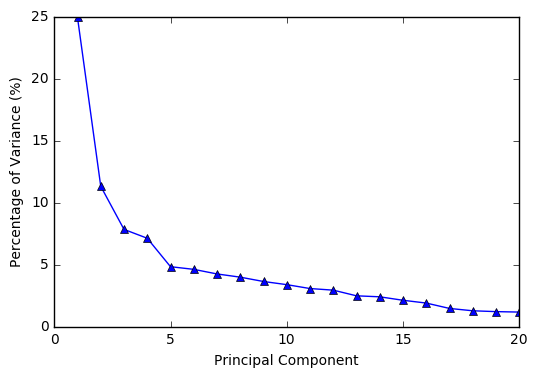

In [90]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(range(1, 21), pca.explained_variance_ratio_*100, marker='^')
plt.xlabel('Principal Component')
plt.ylabel('Percentage of Variance (%)')
plt.show()

In [91]:
pc = 0
total_var = 0
for i in pca.explained_variance_ratio_:
    pc += 1
    total_var += i*100
    print("Variance captured by PC " + str(pc) + ": " + str(total_var))

Variance captured by PC 1: 24.9202427478
Variance captured by PC 2: 36.2263127295
Variance captured by PC 3: 44.0568681702
Variance captured by PC 4: 51.1736450947
Variance captured by PC 5: 55.9963307281
Variance captured by PC 6: 60.605077614
Variance captured by PC 7: 64.8434702026
Variance captured by PC 8: 68.8218865539
Variance captured by PC 9: 72.4510627608
Variance captured by PC 10: 75.8266528202
Variance captured by PC 11: 78.8878895858
Variance captured by PC 12: 81.8193818904
Variance captured by PC 13: 84.2937564529
Variance captured by PC 14: 86.6883759204
Variance captured by PC 15: 88.8034528027
Variance captured by PC 16: 90.693534383
Variance captured by PC 17: 92.1501370341
Variance captured by PC 18: 93.4177520092
Variance captured by PC 19: 94.6174441572
Variance captured by PC 20: 95.78066113


### Performing kmeans again with PCA reduced data:

In [92]:
kmeans = KMeans(n_clusters=2) #Number of clusters = 7)

#Fitting the data
kmeans.fit(DTtrans)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [93]:
kmeans.labels_

array([1, 0, 1, ..., 0, 1, 0], dtype=int32)

In [94]:
#Converting cluster centers array to dataframe and trasposing it so that features are rows and clusters are columns
#Providing it with column_names (features) as 'index' and Cluster Names as 'columns'

pd.DataFrame(kmeans.cluster_centers_.T, index=['PC 1','PC 2','PC 3','PC 4', 'PC 5', 'PC 6', 'PC 7','PC 8','PC 9','PC 10','PC 11', 'PC 12', 'PC 13', 'PC 14','PC15','PC16','PC17','PC18','PC19','PC20'], columns=['Cluster 1', 'Cluster 2'])

,Cluster 1,Cluster 2
PC 1,0.483791,-0.590017
PC 2,0.003792,-0.004625
PC 3,0.113932,-0.138948
PC 4,0.022432,-0.027357
PC 5,0.001834,-0.002237
PC 6,0.008594,-0.010481
PC 7,0.005512,-0.006722
PC 8,-0.004763,0.005809
PC 9,0.001170,-0.001427
PC 10,0.000980,-0.001195


In [95]:
completeness = completeness_score(df_Yarray, kmeans.labels_)
homogeneity = homogeneity_score(df_Yarray, kmeans.labels_)

print('Completeness of Cluster: '+  str(completeness))
print('Homogeneity of Clusters: '+ str(homogeneity))

Completeness of Cluster: 0.000160165101875
Homogeneity of Clusters: 0.000363190196772
